# Setup

In [ ]:
#Installing the necessary tool to
!pip install ucimlrepo
#Cloning the git so that we can access the boston dataset
!git clone https://github.com/justiNNovick/551p1.git

Cloning into '551p1'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 19.64 KiB | 2.81 MiB/s, done.


In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import re
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Task 1: Acquire, preprocess, and analyze the data

## 1. Load the datasets

Download files on Boston Housing Dataset

In [ ]:
# Fetch dataset1 (Boston Housing Dataset)
df_boston = pd.read_csv('551p1/boston.csv')
# Get rid of column labelled "B"
df_boston = df_boston.drop(columns='B')

# Fetch dataset2 (Wine Dataset)
wine = fetch_ucirepo(id=109)

## 2. Clean the data

### Boston Housing Dataset

In [ ]:
# Making sure that there are no cells with empty strings in the dataset
df_boston = df_boston[~df_boston.eq('').any(axis=1)]

regex_pattern = r'^-?\d+(\.\d+)?$'

# Create and apply a mask where True values indicate rows to keep
mask = df_boston.applymap(lambda x: bool(re.match(regex_pattern, str(x)))).all(axis=1)
df_boston = df_boston[mask]

### Wine Dataset

In [ ]:
# Set X and y values for Wine Dataset
x_wine = wine.data.features
y_wine = wine.data.targets

# Concatenate features and targets
df_wine = pd.concat([x_wine, y_wine], axis = 1)

# Deleting any rows which have empty cells:
df_wine = df_wine[~df_wine.eq('').any(axis=1)]

# Regular expression pattern
pattern = r'^-?\d+(\.\d+)?$'

# Create and apply a mask where True values indicate rows to keep
mask = df_wine.applymap(lambda x: bool(re.match(pattern, str(x)))).all(axis=1)
df_wine = df_wine[mask]

### Make variables for x and y of each dataset

In [ ]:
x_boston = df_boston.drop('MEDV', axis=1).values
y_boston = df_boston['MEDV'].values

x_wine = df_wine.drop('class', axis=1).values
y_wine = df_wine['class'].values

## 3. Compute basic statistics

### Boston Housing Dataset

#### Visualize Raw Data

See the whole Data Frame to see structure as a whole:

In [ ]:
df_boston

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.7   2.94  33.4  
4       18.7   5.33  36.2  
..       ...    ...   ...  
501     21.0   9.67  22.4  
502     21.0   9.08  20.6  
503     21.0   5.64  23.9  
504     21.0   6.48  22.0  
505     21.0   7.88  11.9  

[506 rows x 13 columns]

See parameters (X values):

In [ ]:
x_boston

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 2.9600e+02, 1.5300e+01,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 2.4200e+02, 1.7800e+01,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.7300e+02, 2.1000e+01,
        7.8800e+00]])

See target y values (median value of owner-occupied homes in $1000s):

In [ ]:
y_boston

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

#### Histograms or kernel density plots for each variable:

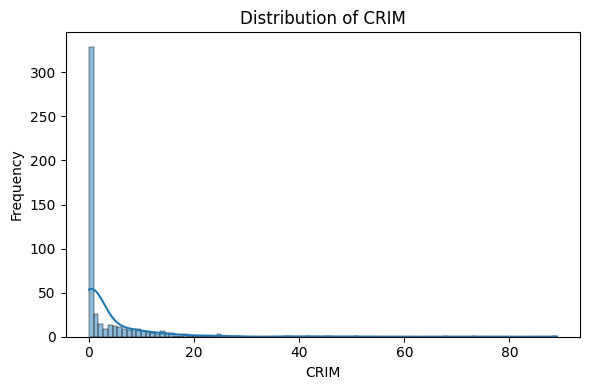

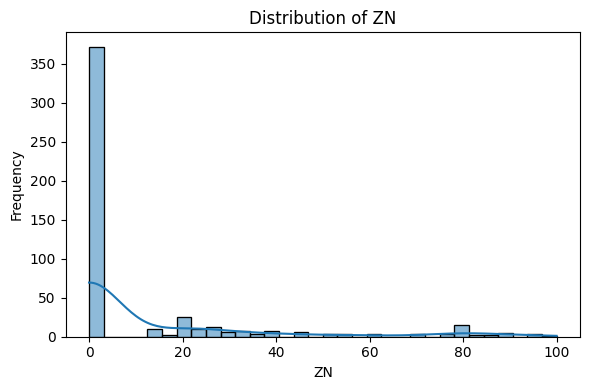

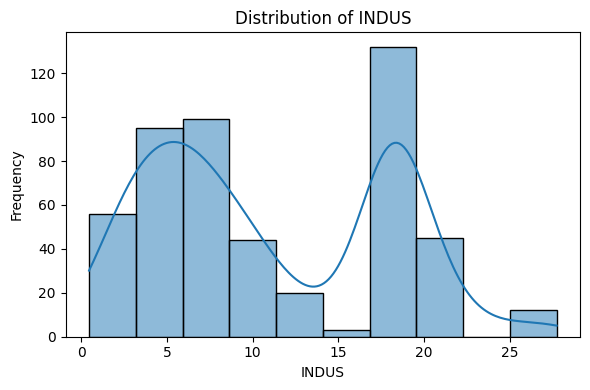

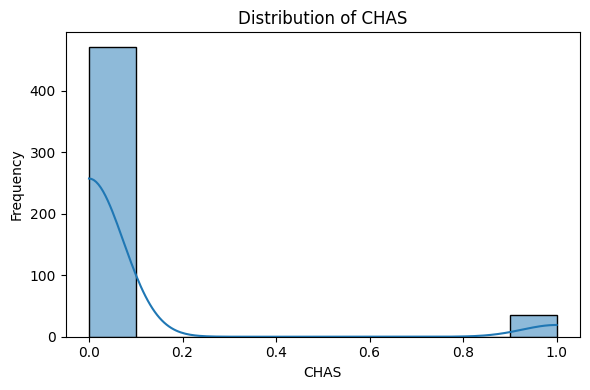

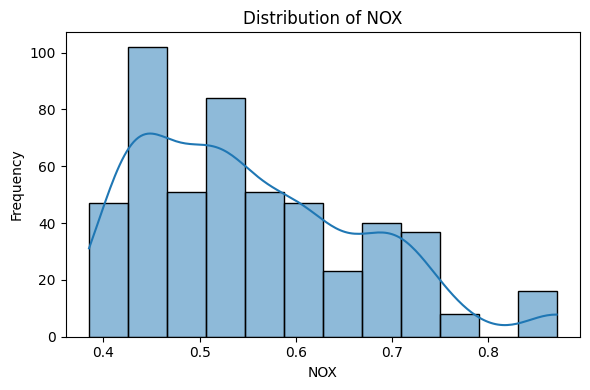

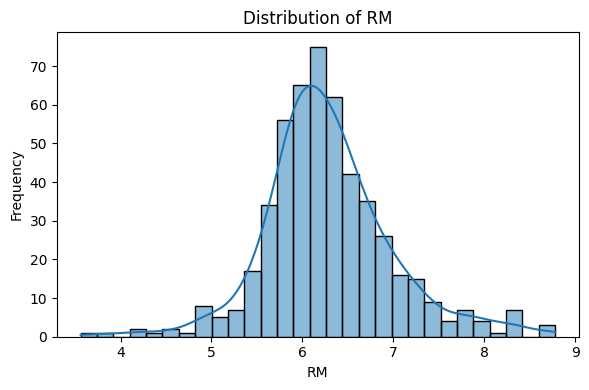

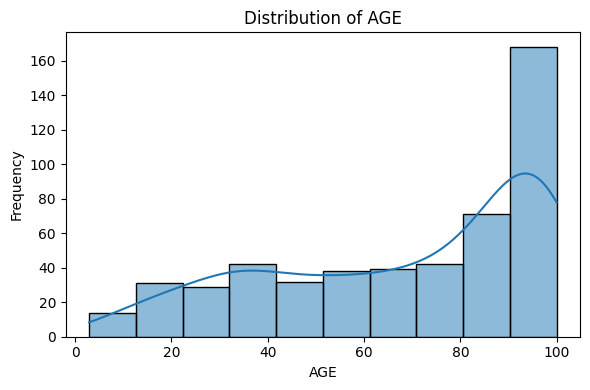

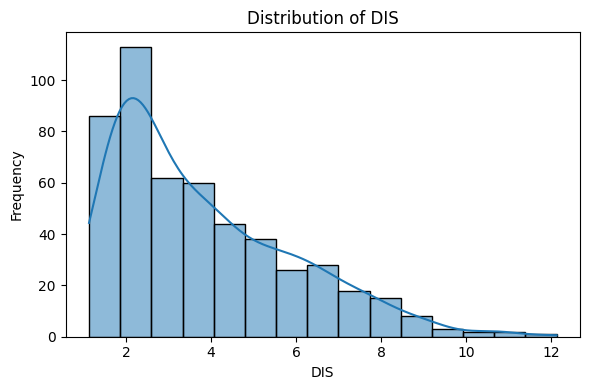

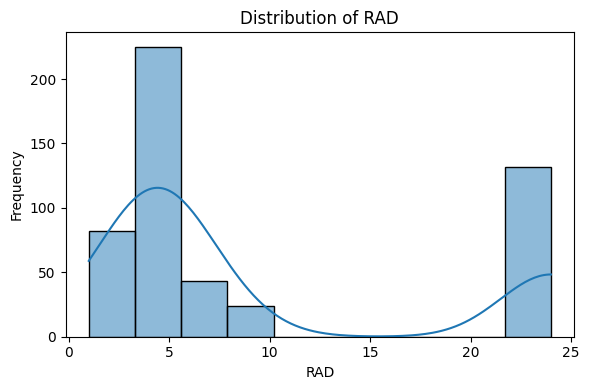

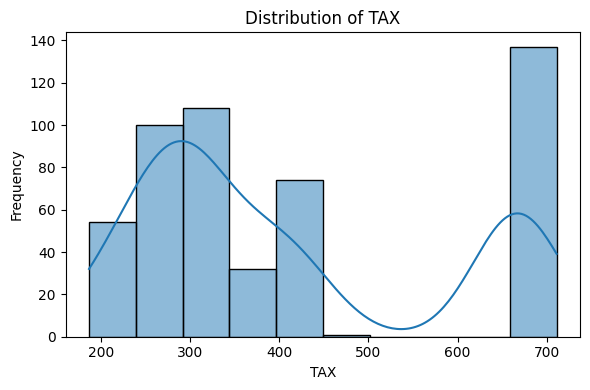

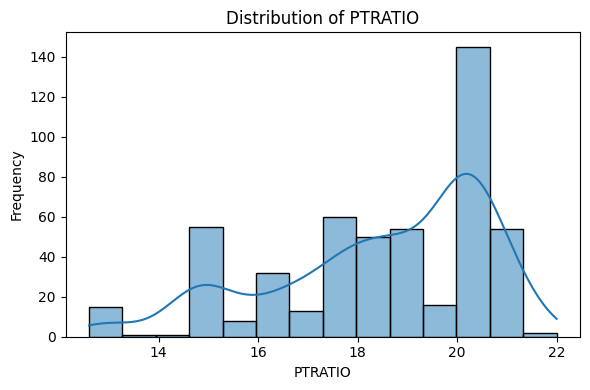

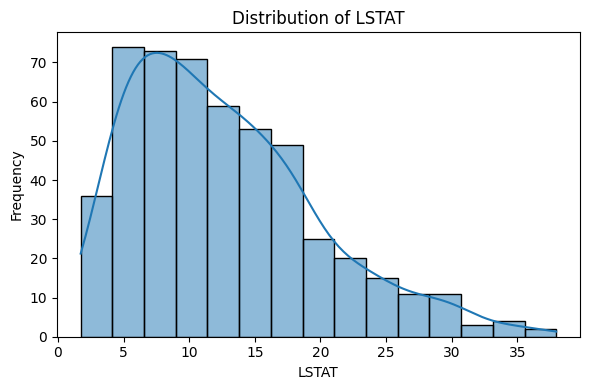

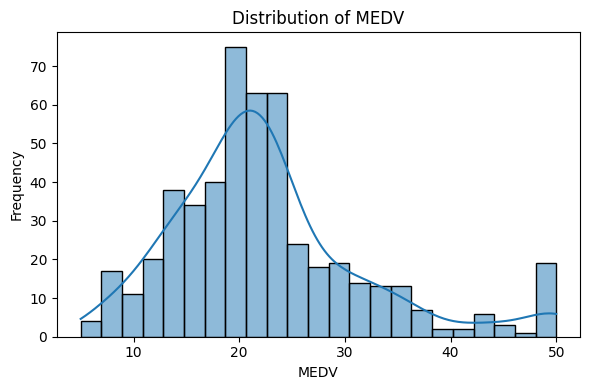

In [ ]:
for col in df_boston.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_boston[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

#### Scatterplots of predictors against dependent variable:

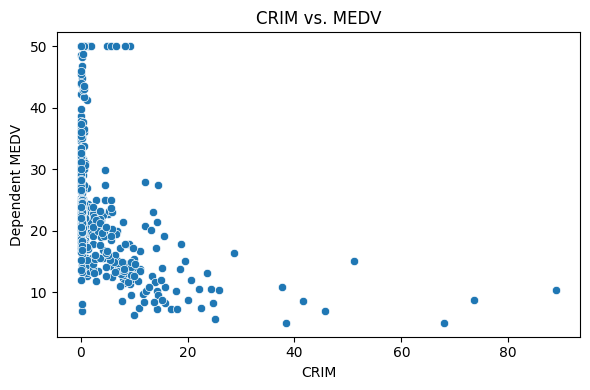

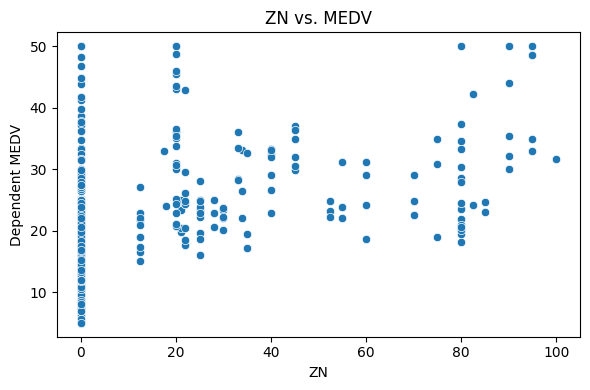

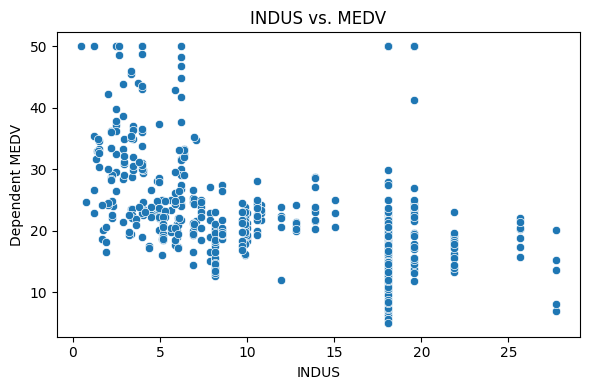

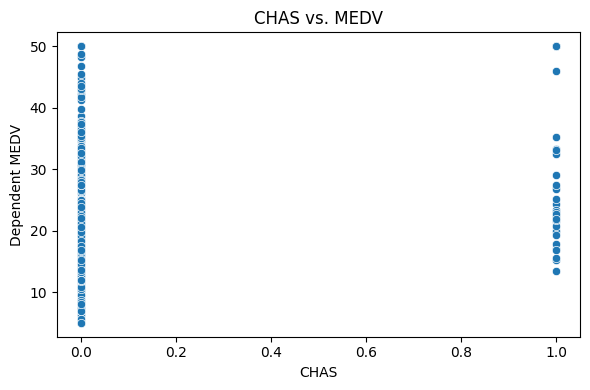

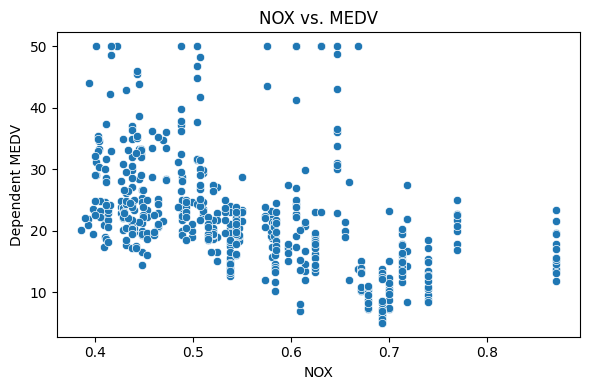

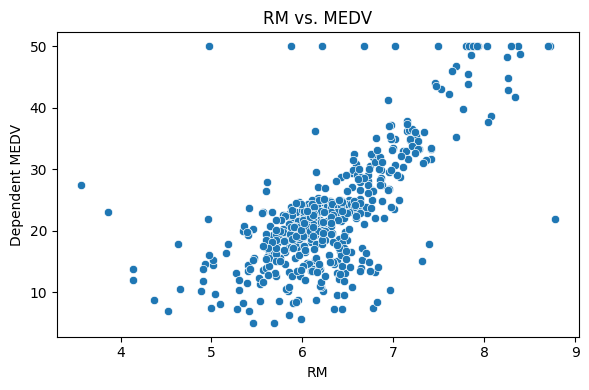

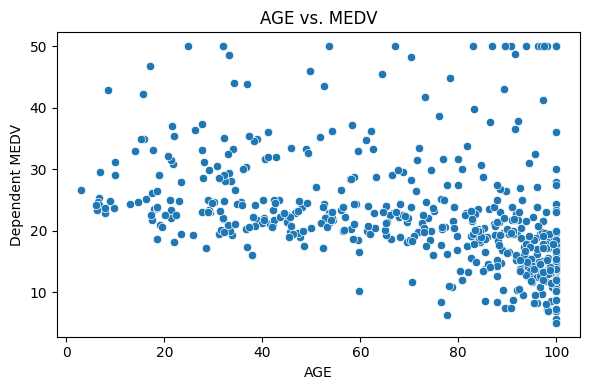

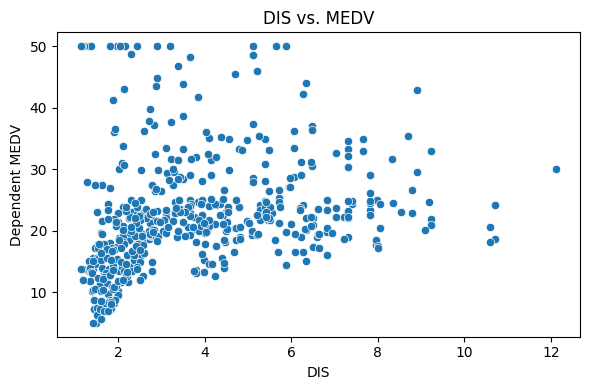

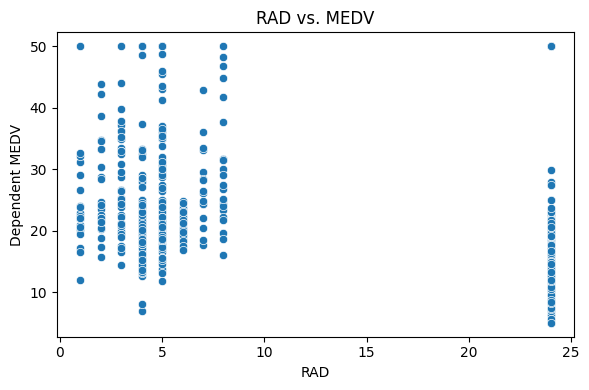

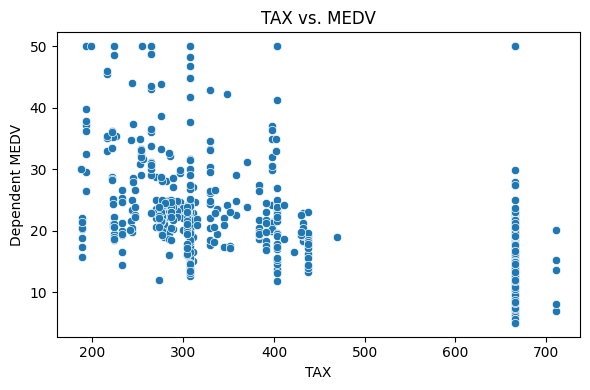

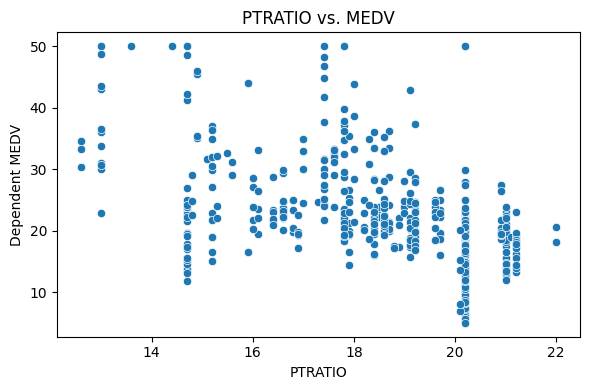

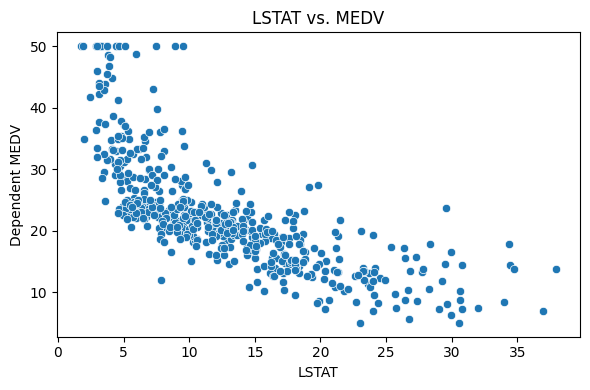

In [ ]:
for col in df_boston.drop("MEDV", axis=1).columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_boston[col], y=y_boston)
    plt.title(f'{col} vs. MEDV')
    plt.xlabel(col)
    plt.ylabel('Dependent MEDV')
    plt.tight_layout()
    plt.show()

#### Pair plots or correlation matrix (useful for multiple predictors).

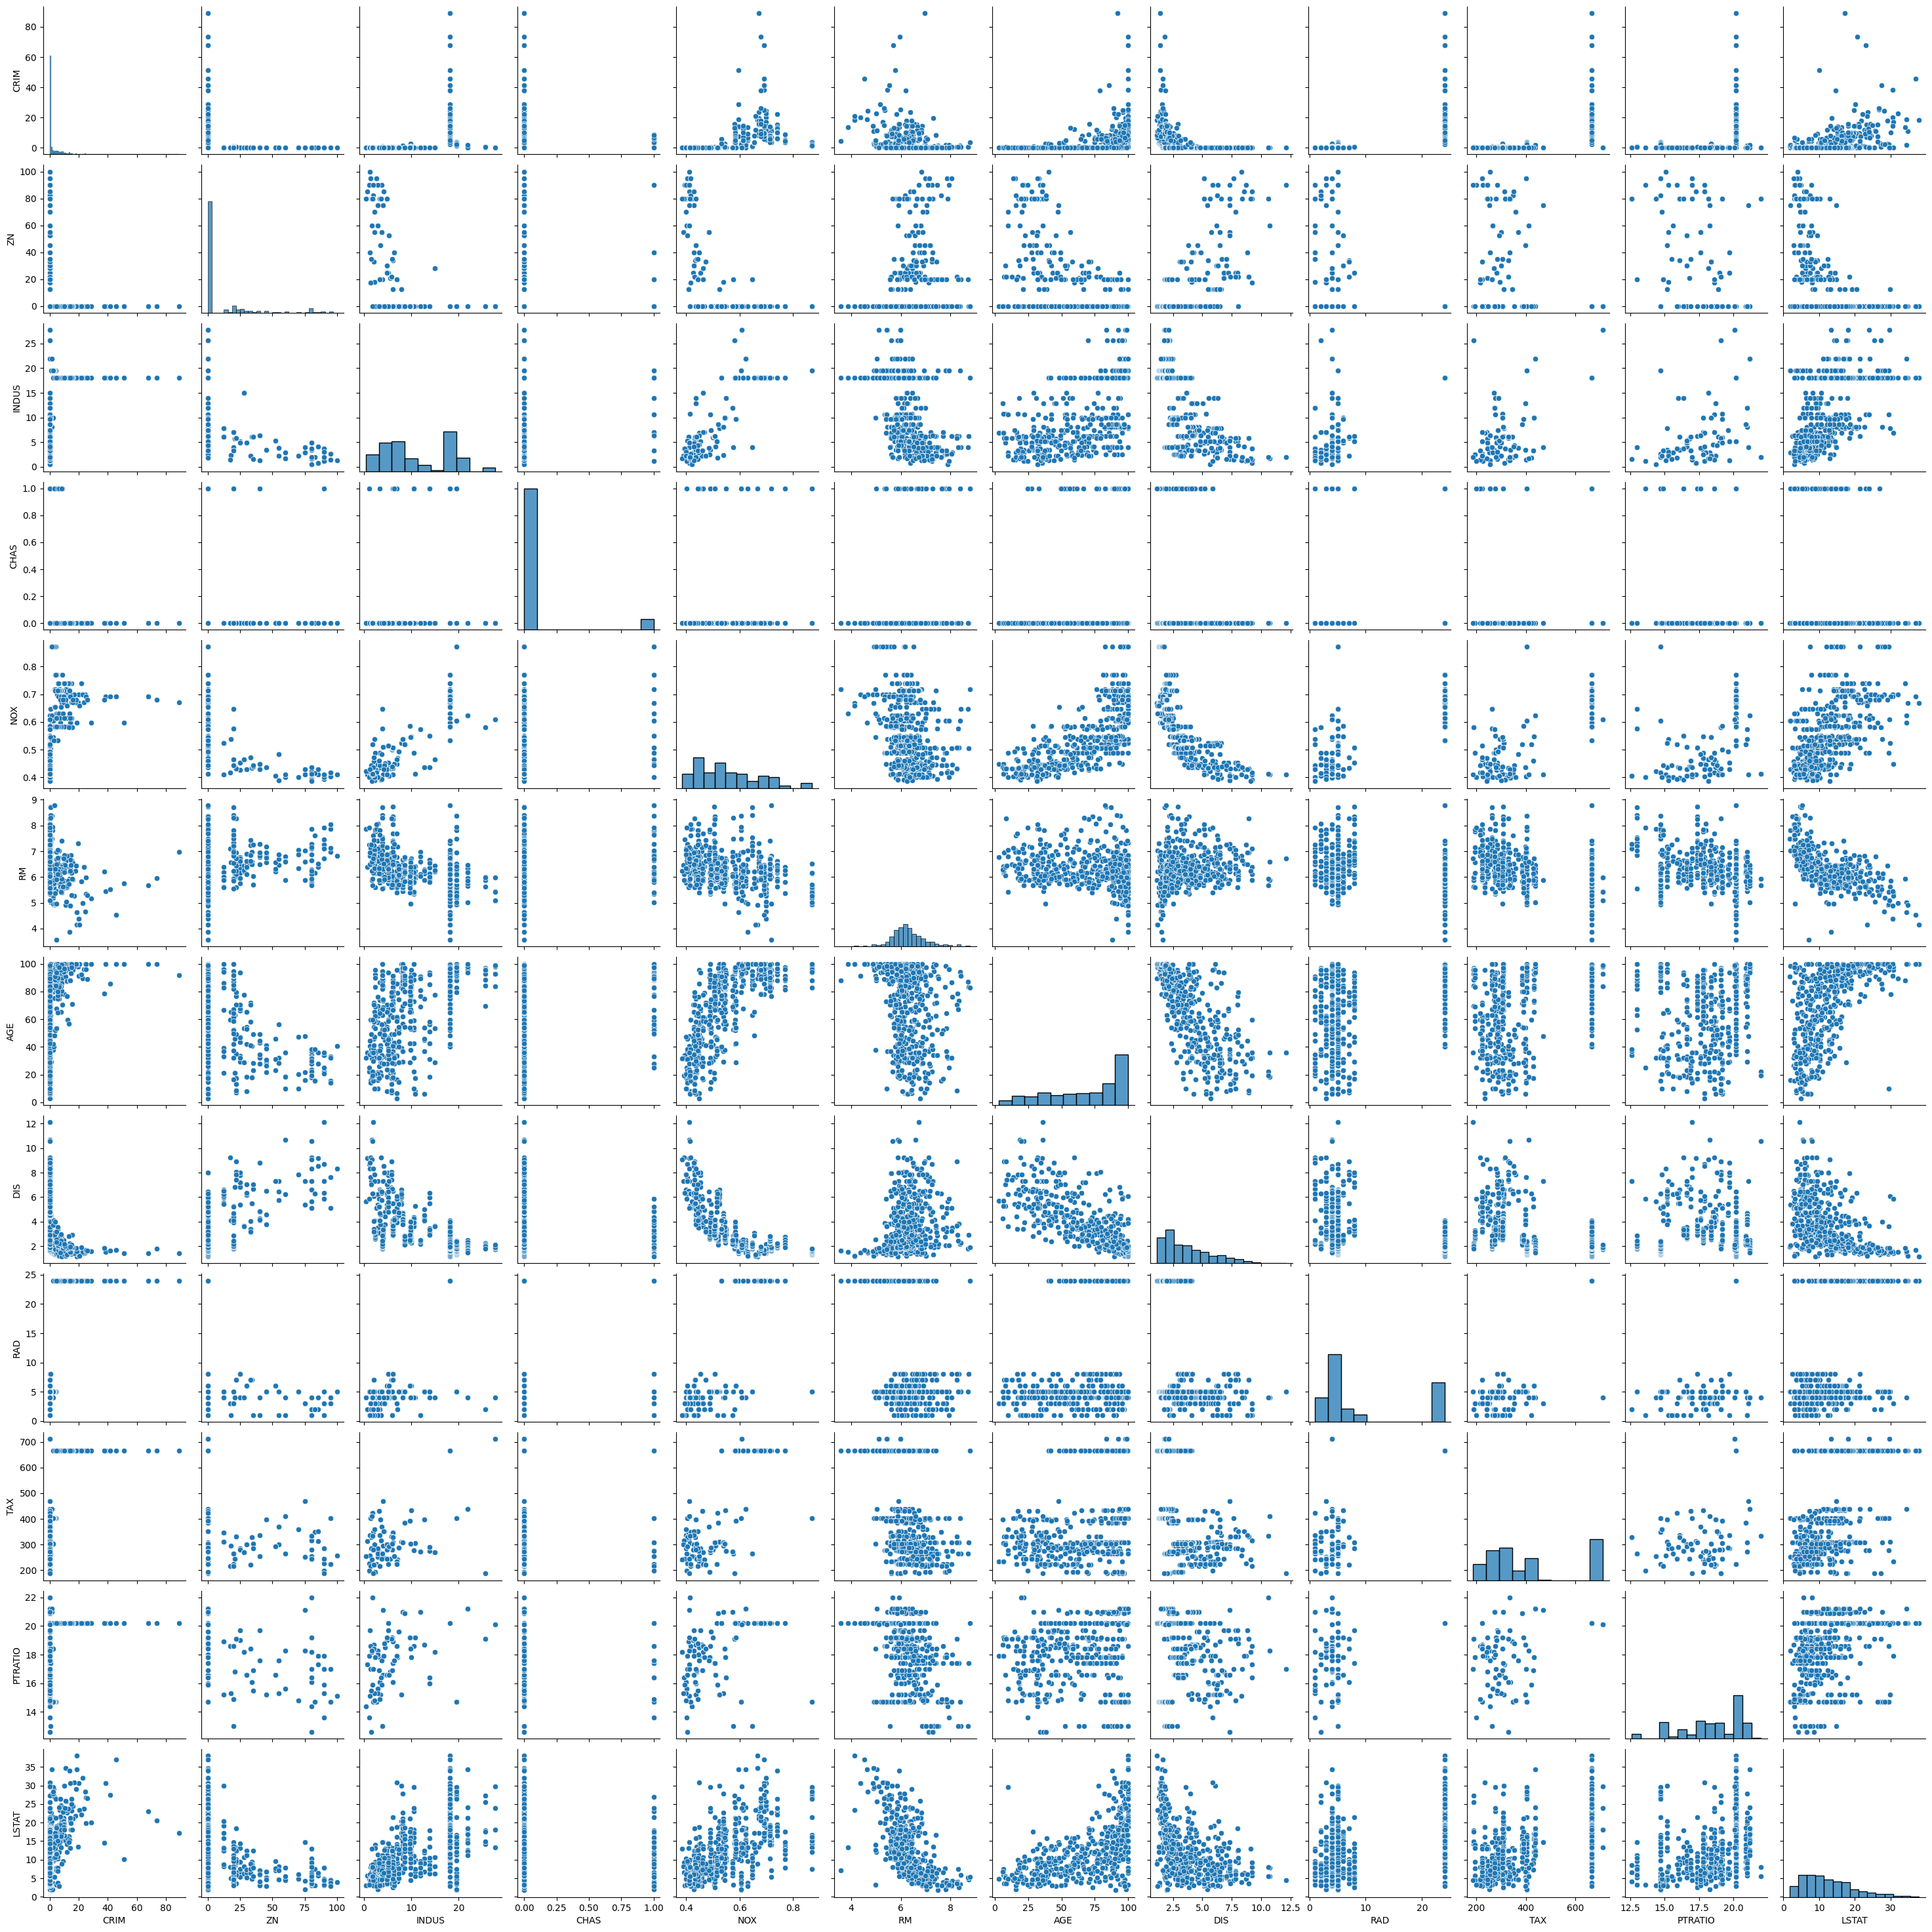

In [ ]:
sns.pairplot(df_boston.drop("MEDV", axis=1))

#### Correlation heatmap:

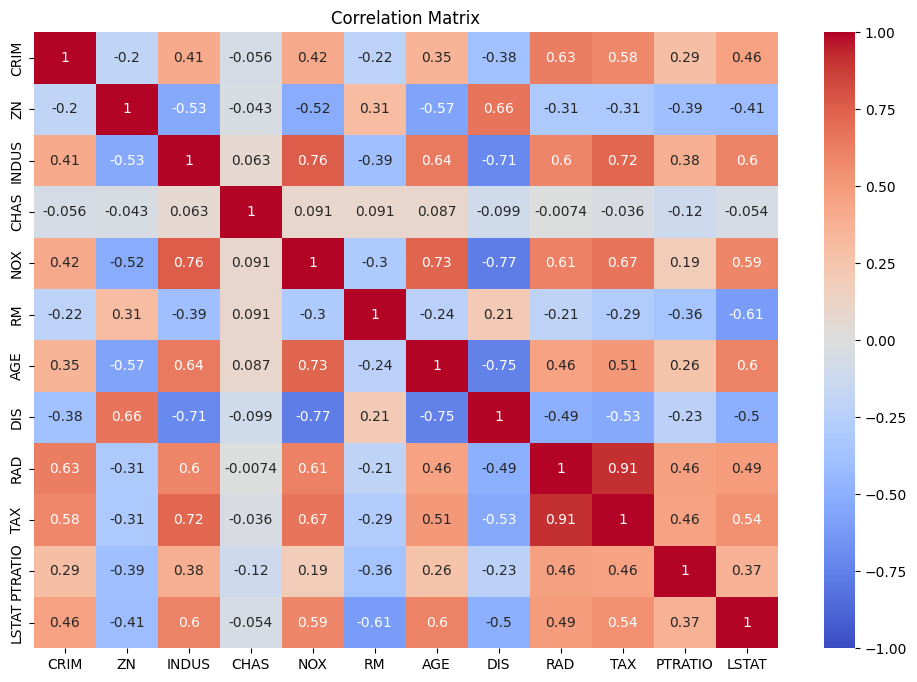

In [ ]:
correlation_matrix = df_boston.drop("MEDV", axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### Boxplots for each predictor (helpful for identifying outliers):

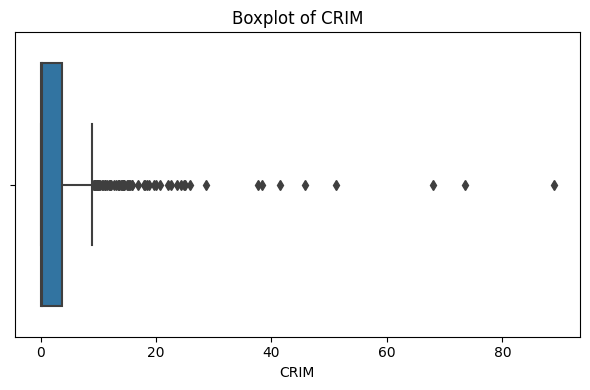

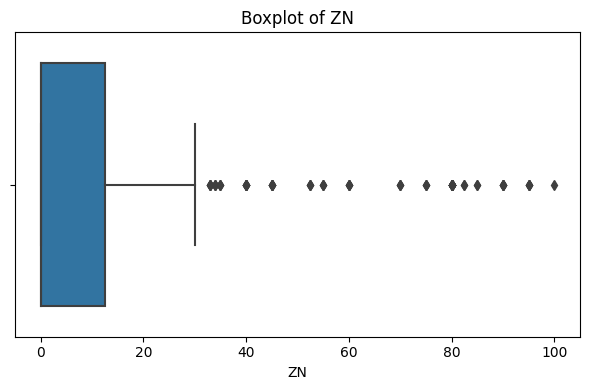

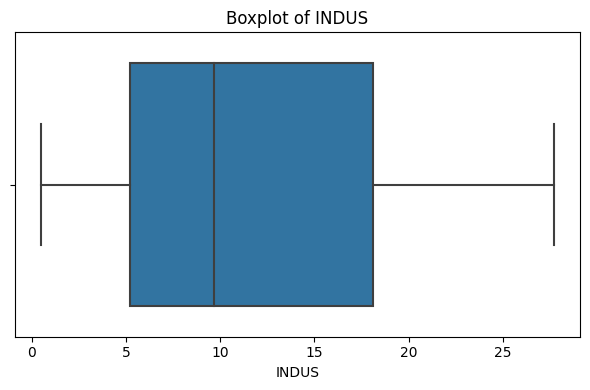

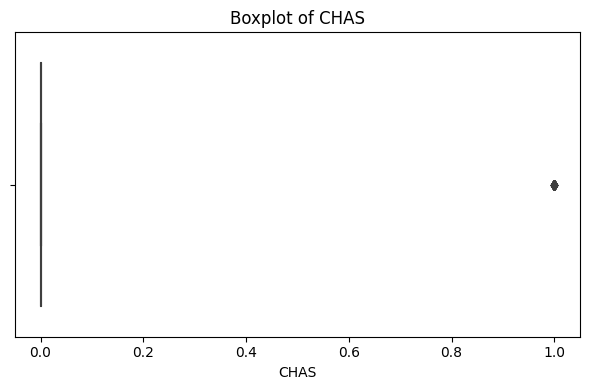

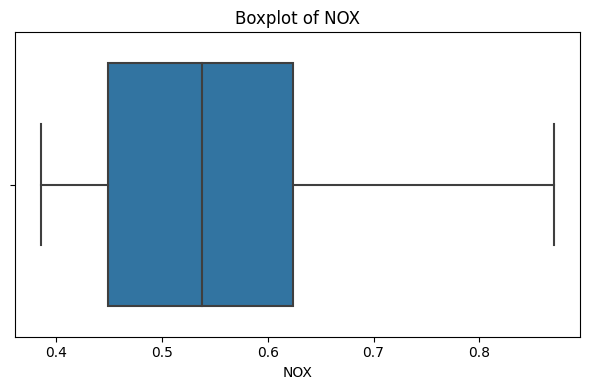

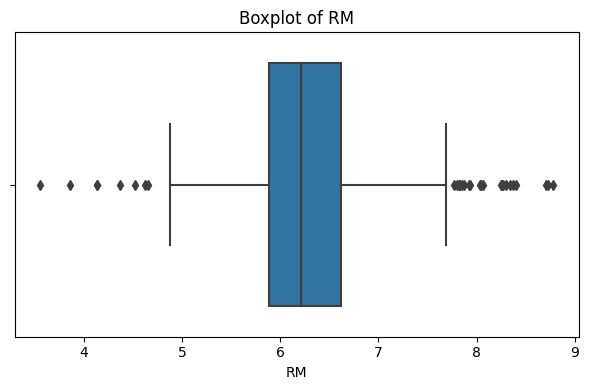

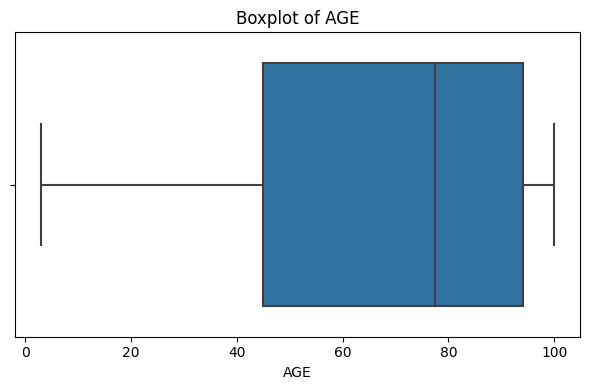

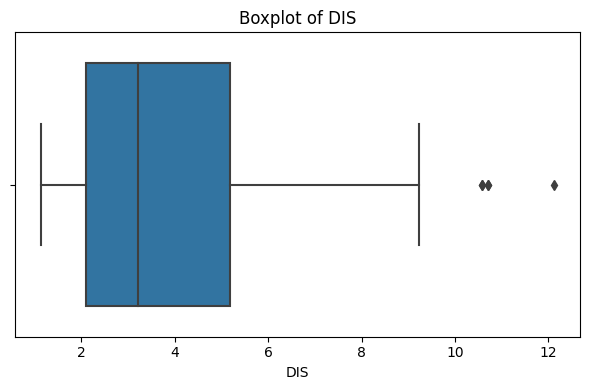

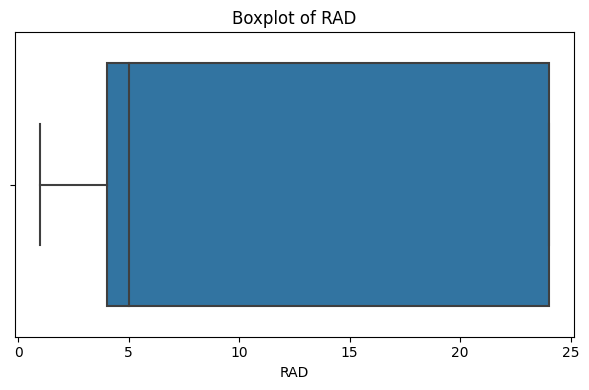

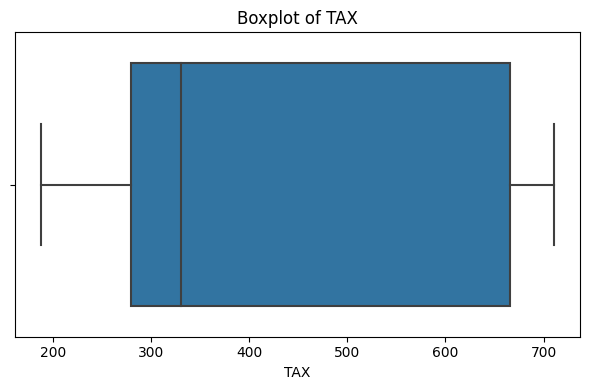

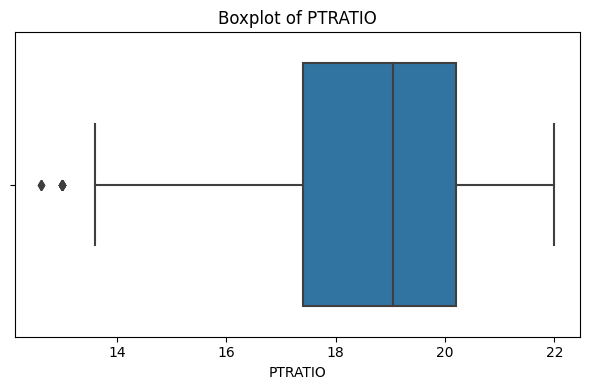

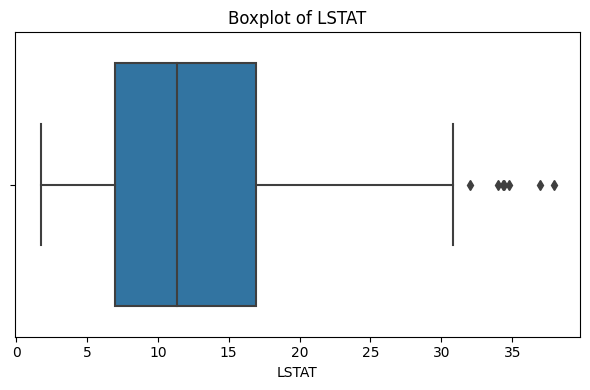

In [ ]:
for col in df_boston.drop("MEDV", axis=1).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_boston[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


#### Calculate Basic Statistics
Mean, Median, Mode & Variance (For both Features & Target Variable)


In [ ]:
boston_means = df_boston.mean()
boston_medians = df_boston.median()
boston_modes = df_boston.mode().iloc[0]
boston_variances = df_boston.var()

# Outputing the statistics into a dataframe for viewing, and returning the data frame
boston_stats_df = pd.DataFrame({'Mean': boston_means, 'Median' : boston_medians, 'Mode' : boston_modes, 'Variance' : boston_variances})
boston_stats_df

Mean     Median       Mode      Variance
CRIM       3.613524    0.25651    0.01501     73.986578
ZN        11.363636    0.00000    0.00000    543.936814
INDUS     11.136779    9.69000   18.10000     47.064442
CHAS       0.069170    0.00000    0.00000      0.064513
NOX        0.554695    0.53800    0.53800      0.013428
RM         6.284634    6.20850    5.71300      0.493671
AGE       68.574901   77.50000  100.00000    792.358399
DIS        3.795043    3.20745    3.49520      4.434015
RAD        9.549407    5.00000   24.00000     75.816366
TAX      408.237154  330.00000  666.00000  28404.759488
PTRATIO   18.455534   19.05000   20.20000      4.686989
LSTAT     12.653063   11.36000    6.36000     50.994760
MEDV      22.532806   21.20000   50.00000     84.586724

### Wine Dataset

#### Visualize Raw Data

See the whole Data Frame to see structure as a whole:

In [ ]:
df_wine

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     0D280_0D315_of_diluted_wines  Proline  class  
0                            3.92     1065      1  
1                            3.40     1050      1  
2                            3.17     1185      1  
3                            3.45     1480      1  
4                            2.93      735      1  
..                            ...      ...    ...  
173                          1.74      740      3  
174                          1.56      750      3  
175                          1.56      835      3  
176                          1.62      840      3  
177                          1.60      560      3  

[178 rows x 14 columns]

See parameters (X values):

In [ ]:
x_wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

See target y values (class of wine, separated into three categories):

In [ ]:
y_wine

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

#### Histograms or kernel density plots for each variable:

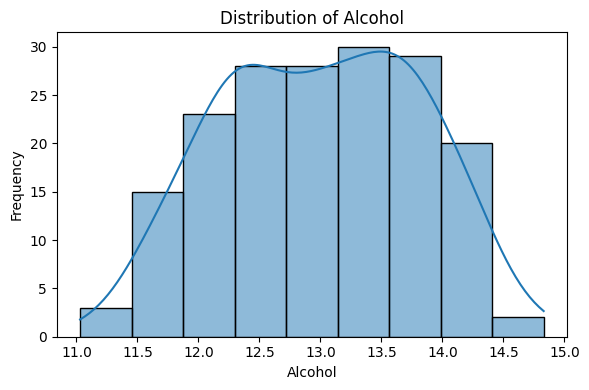

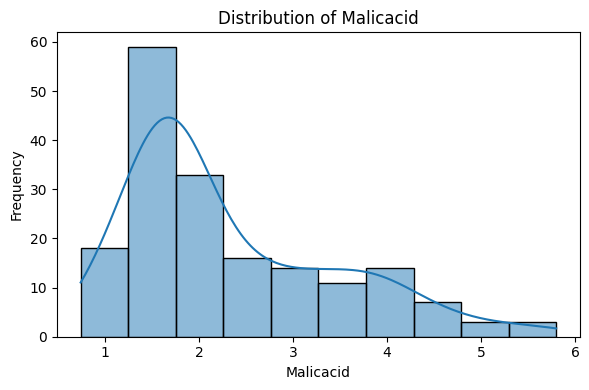

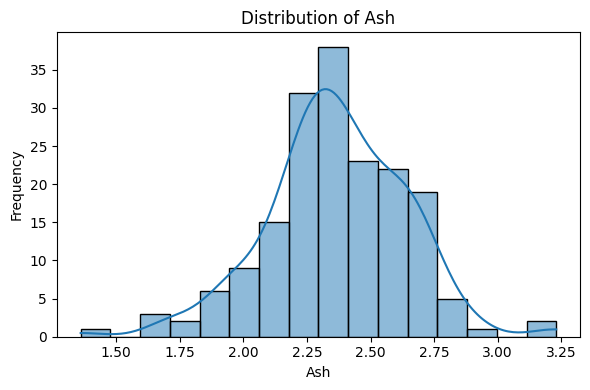

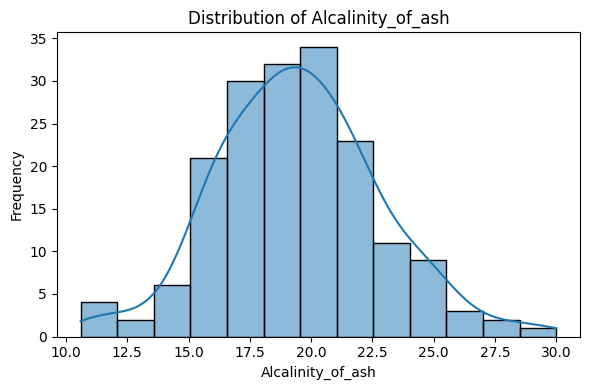

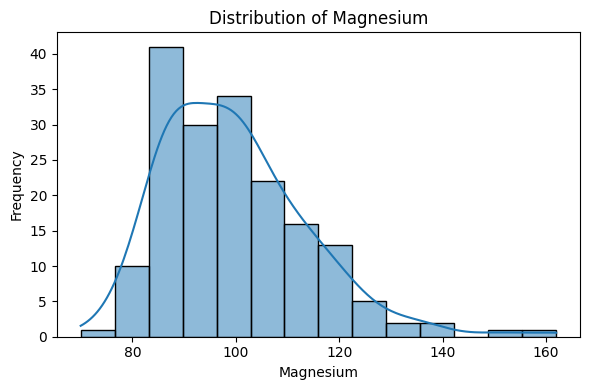

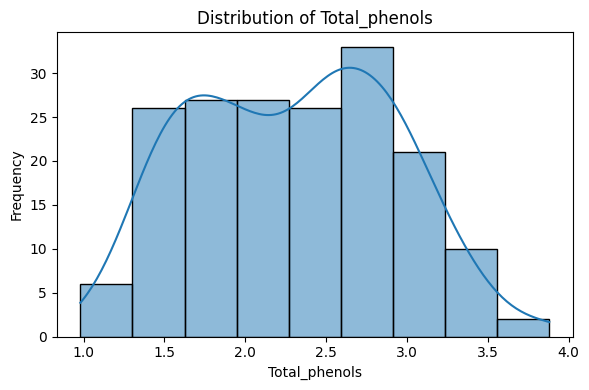

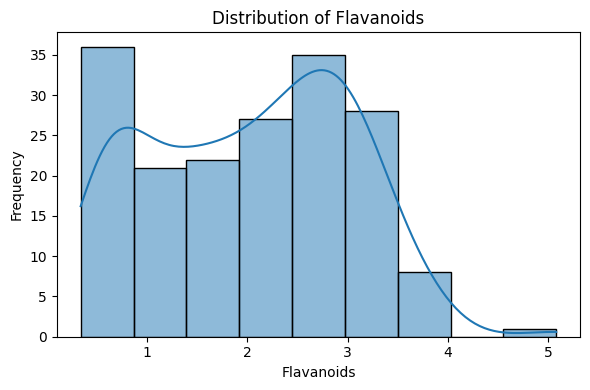

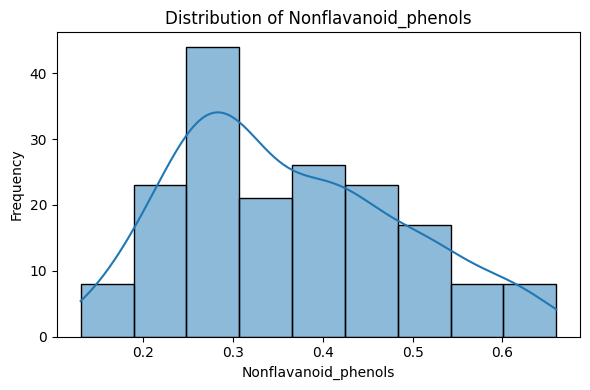

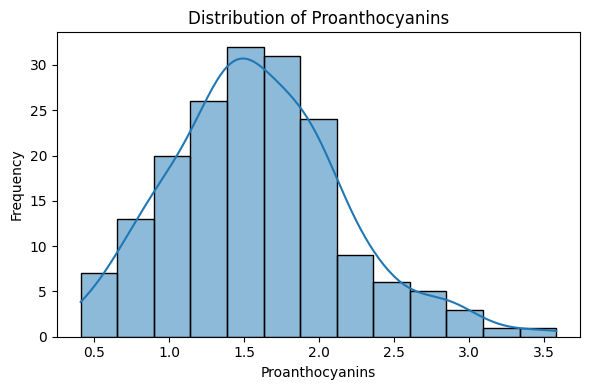

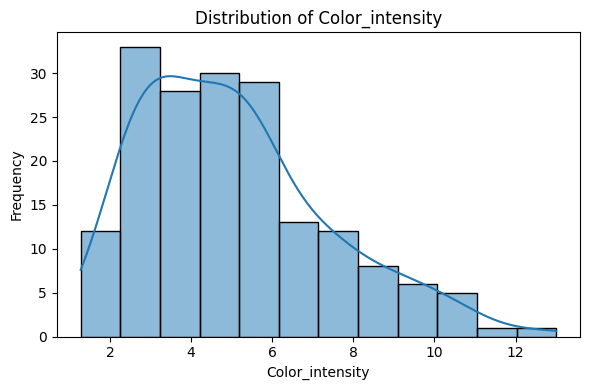

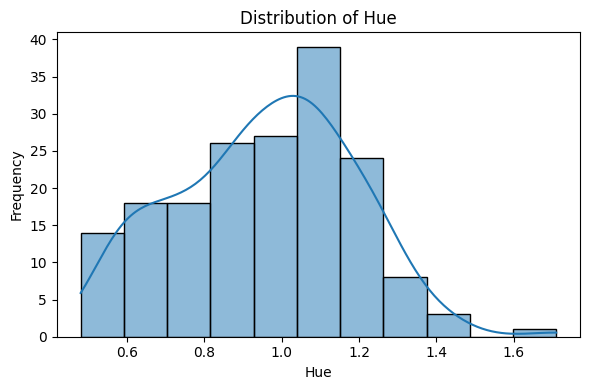

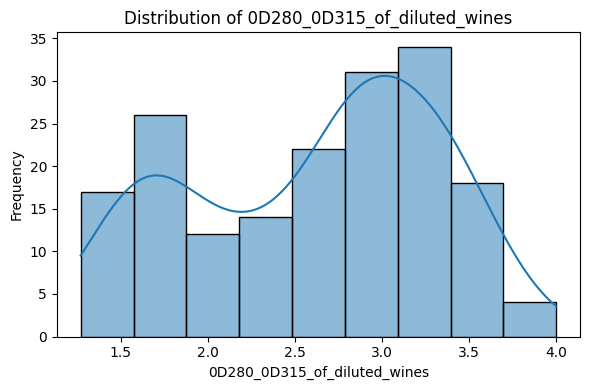

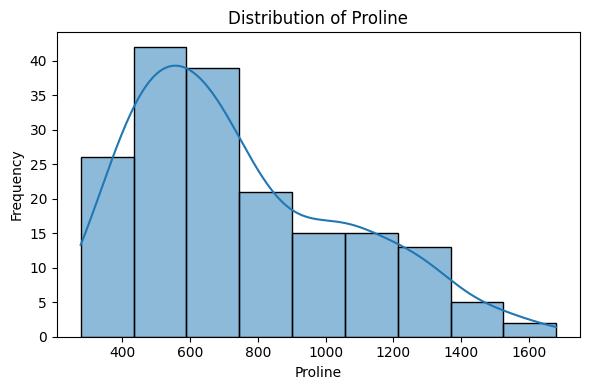

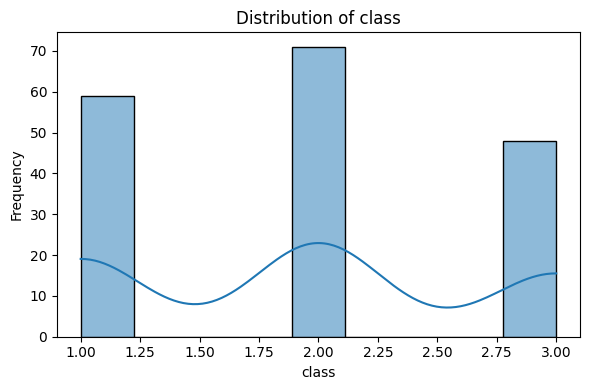

In [ ]:
for col in df_wine.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_wine[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

#### Scatterplots of predictors against dependent variable:

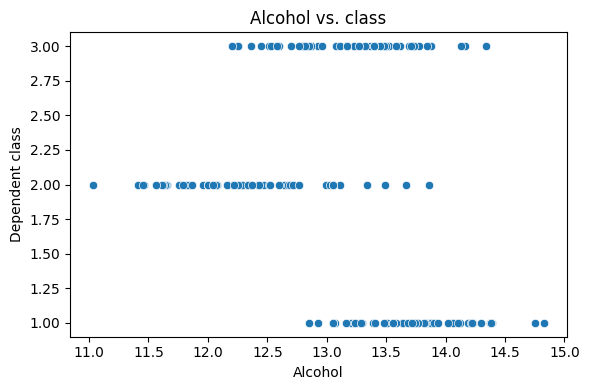

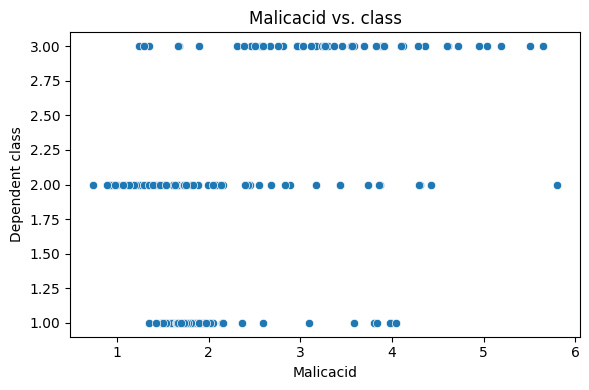

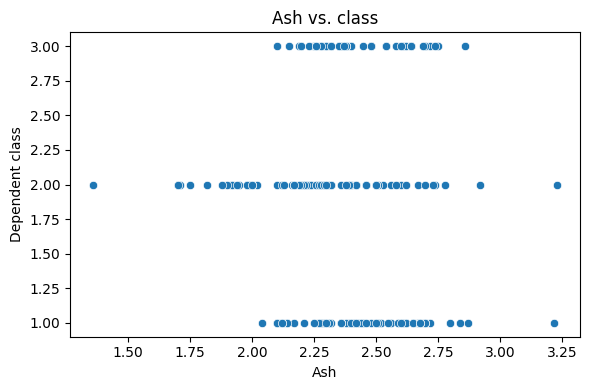

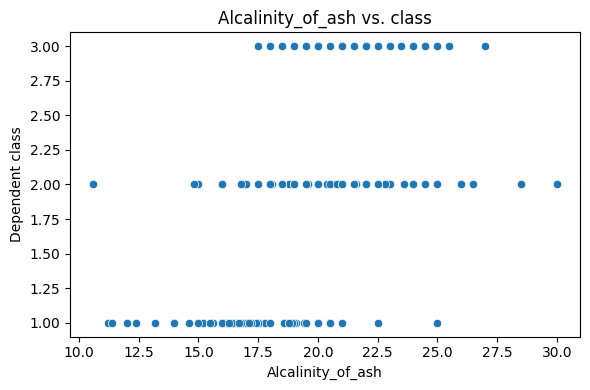

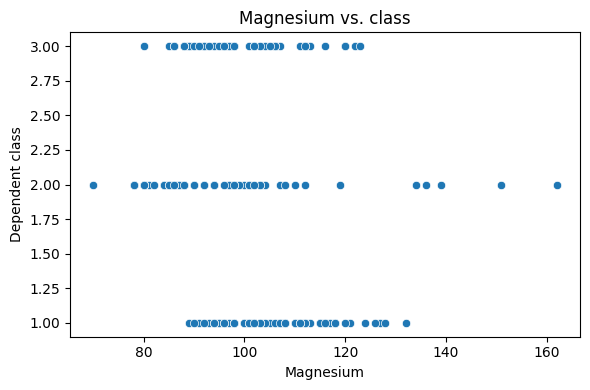

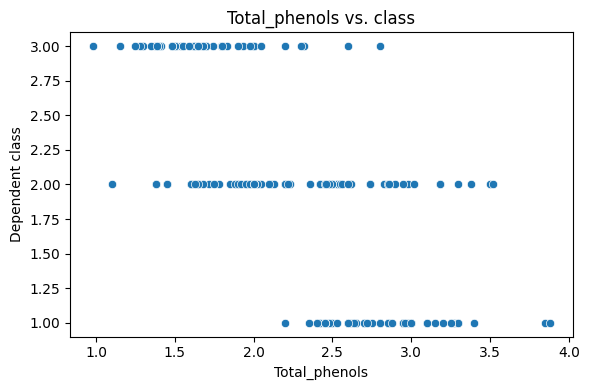

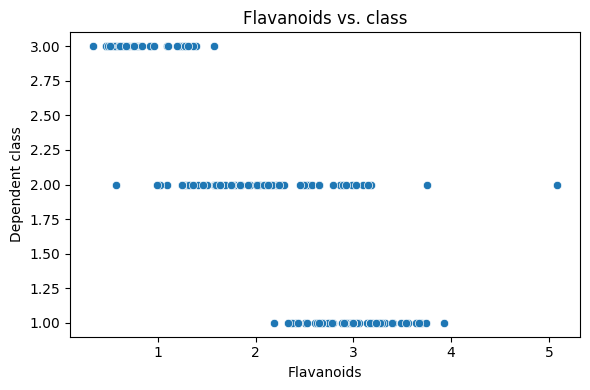

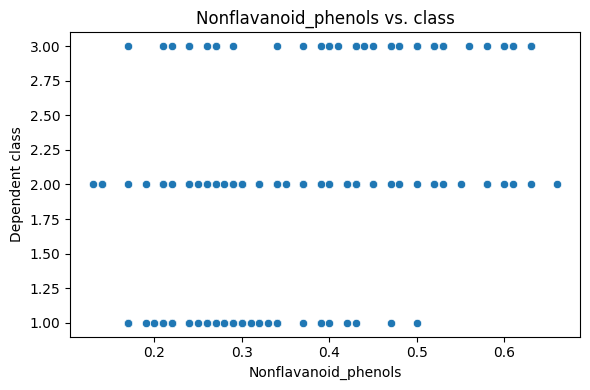

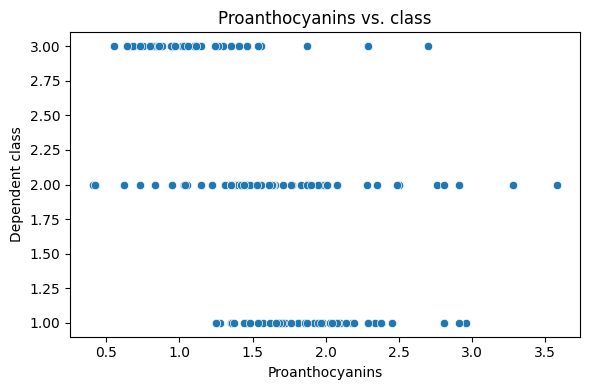

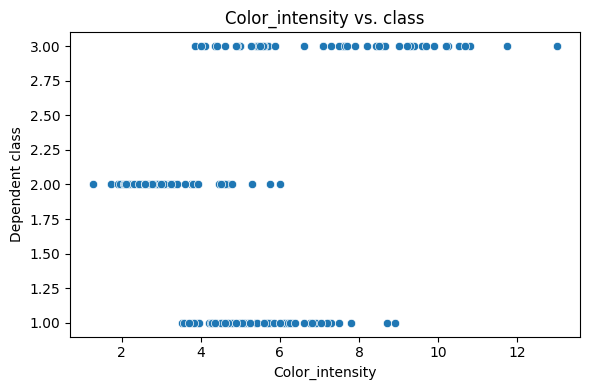

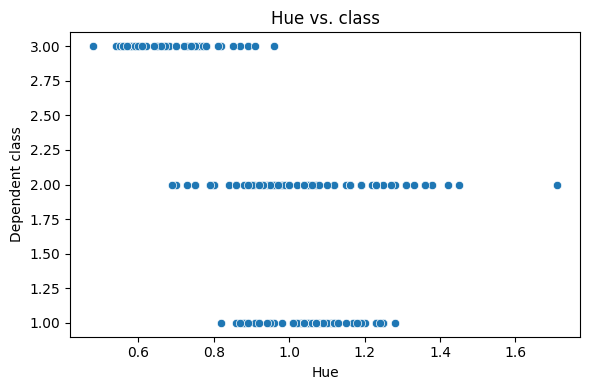

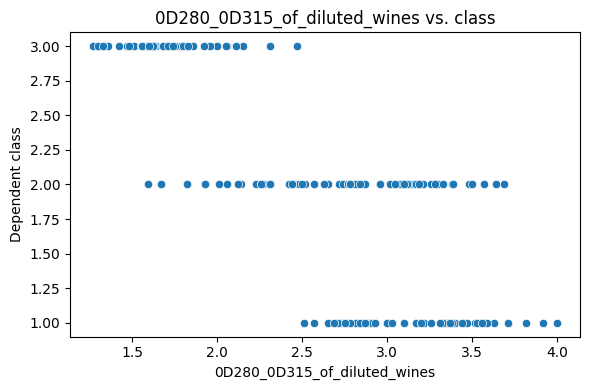

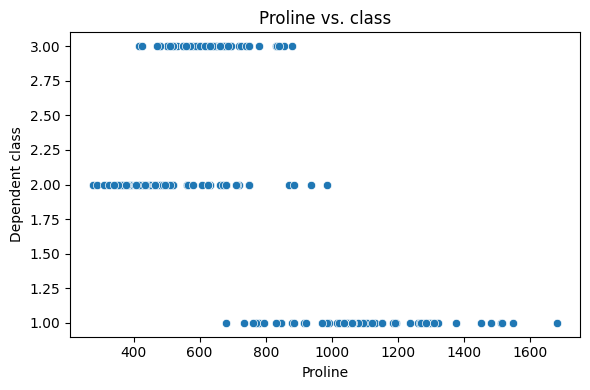

In [ ]:
for col in df_wine.drop("class", axis=1).columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_wine[col], y=y_wine)
    plt.title(f'{col} vs. class')
    plt.xlabel(col)
    plt.ylabel('Dependent class')
    plt.tight_layout()
    plt.show()

#### Pair plots or correlation matrix (useful for multiple predictors).

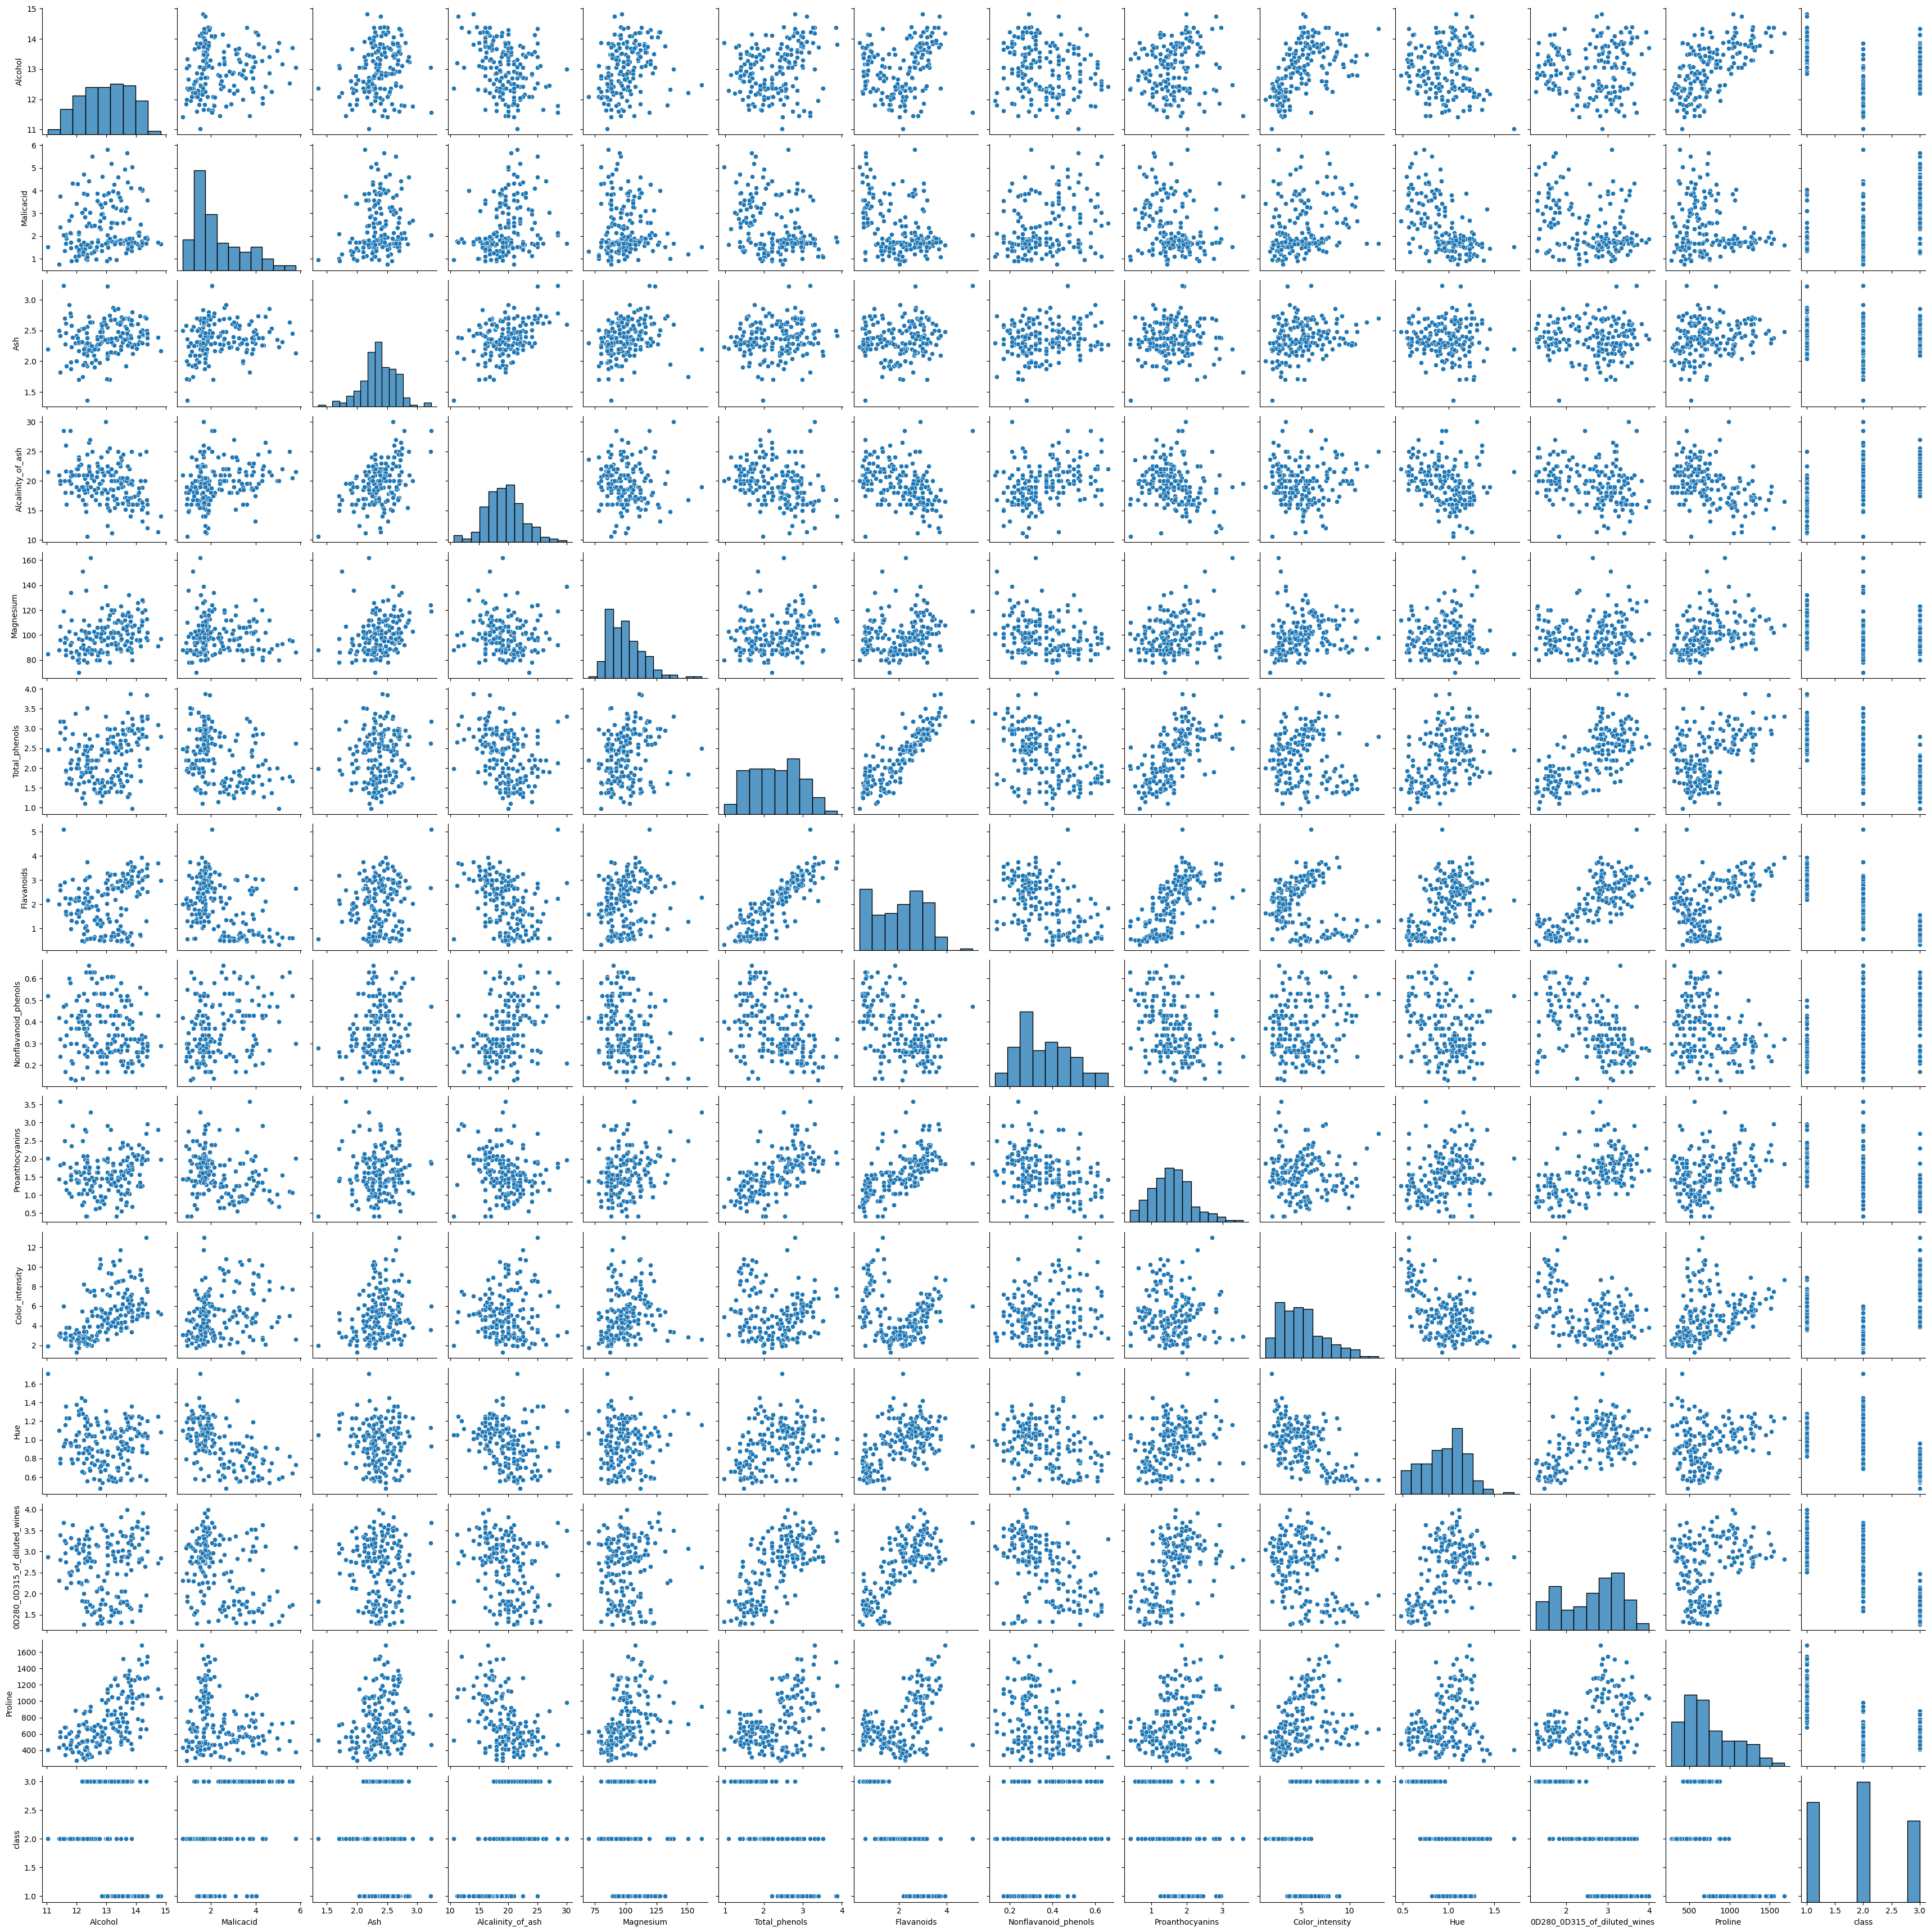

In [ ]:
sns.pairplot(df_wine)

#### Correlation heatmap:

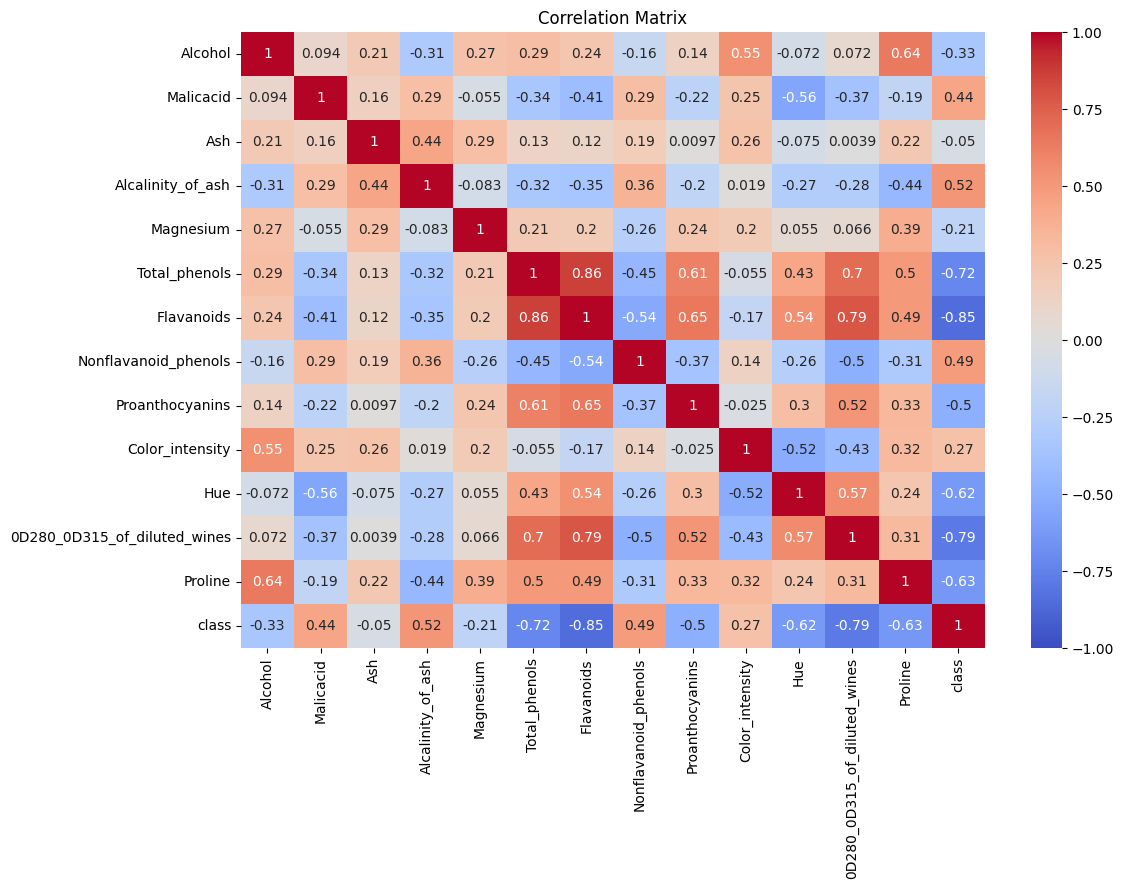

In [ ]:
correlation_matrix = df_wine.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### Boxplots for each predictor (helpful for identifying outliers):

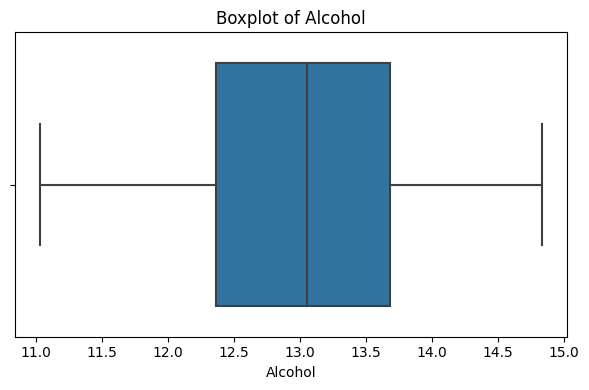

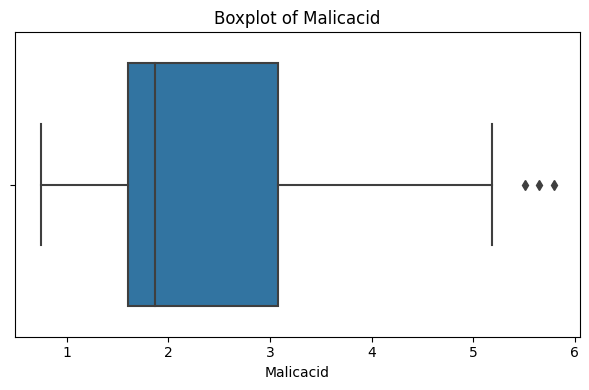

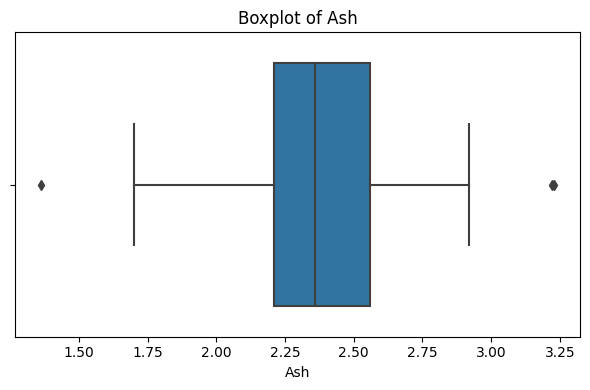

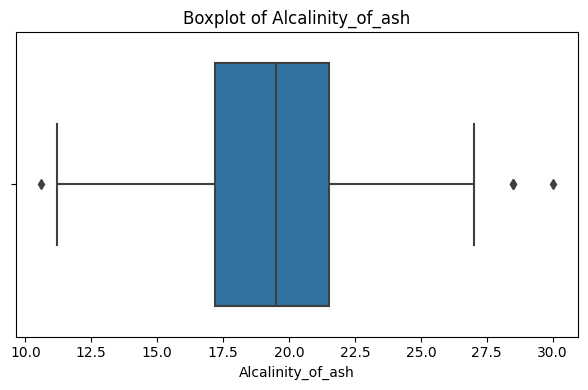

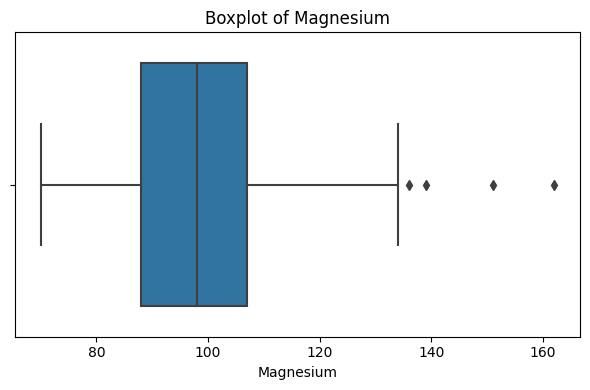

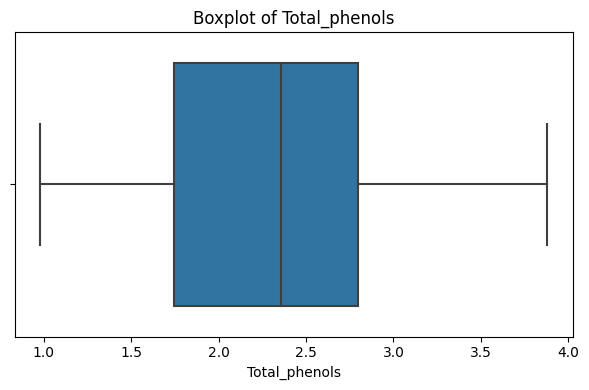

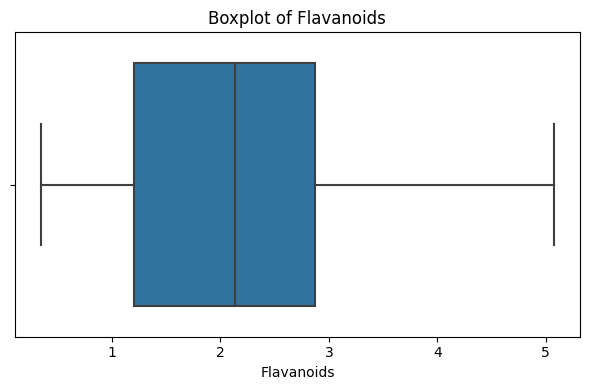

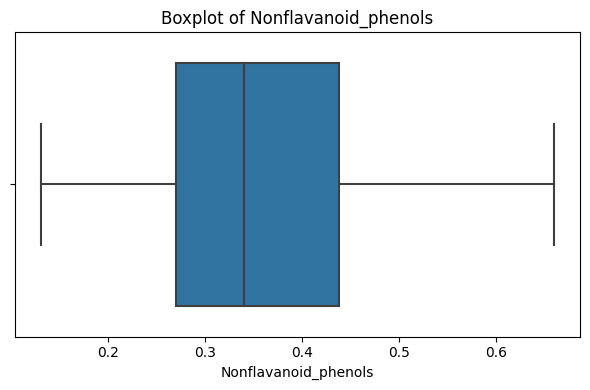

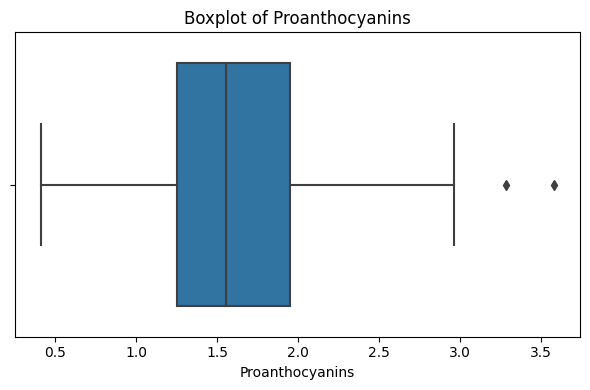

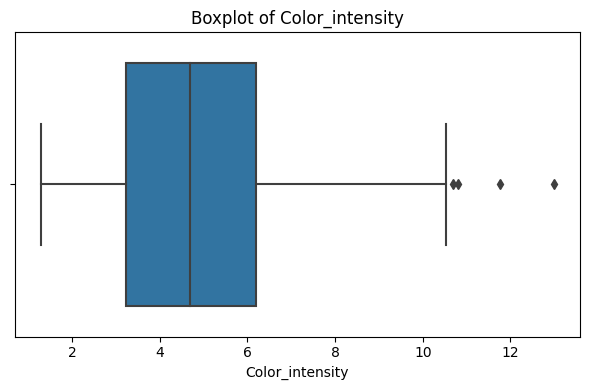

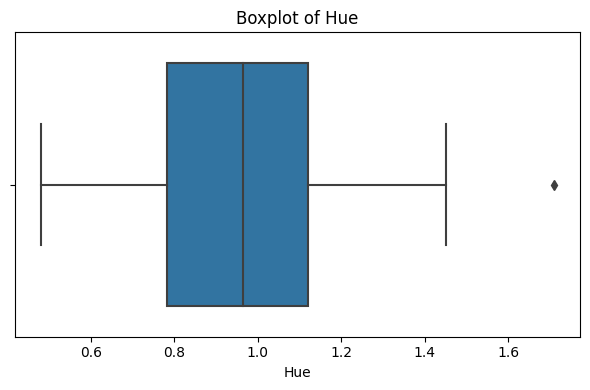

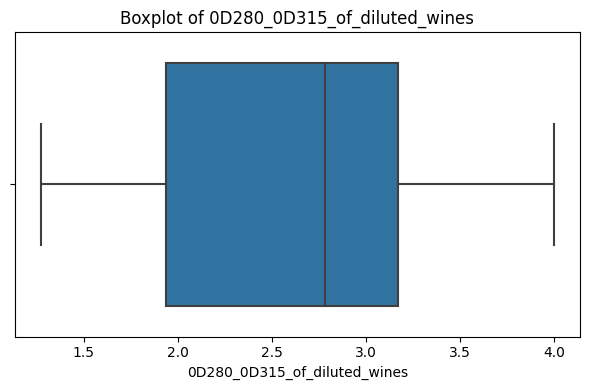

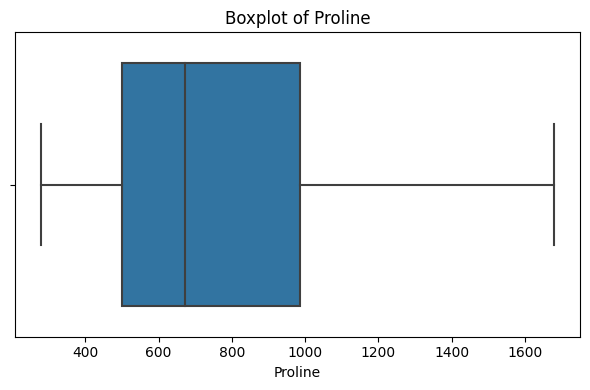

In [ ]:
for col in df_wine.drop("class", axis=1).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_wine[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


# Task 2: Implement the models

##  Linear Regression Class


In [ ]:
class AnalyticalLinearRegression:
  def __init__(self, add_bias=True):
      self.add_bias = add_bias

  def fit(self, x, y):
    if x.ndim == 1:
      x = x[:, None]                         #add a dimension for the features
      N = x.shape[0]
    else:
      N = x.shape[0]            # N is the number of rows (data points) we have

    if self.add_bias:
      x = np.column_stack([np.ones(N),x])    #add bias by adding a constant feature of value 1

    self.w = np.linalg.inv((x.T) @ x) @ (x.T) @ y   # Implements the closed form solution
    #self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
    return self

  def predict(self, x):
    N = x.shape[0]
    if self.add_bias:
      x = np.column_stack([np.ones(N), x])
    yh = x @ self.w                             #predict the y values
    return yh

#### Testing Analytical Linear Regression



In [ ]:
# # For Dataset 1
# x = df_boston.drop('MEDV', axis=1)
# y = df_boston['MEDV'].values
# #np.shape(y)

# model = AnalyticalLinearRegression(True)
# fit = model.fit(x,y)
# y_pred = model.predict(x)
# mse_loss = np.mean((y_pred - y) ** 2)
# print(f"Total Mean Squared Error: {mse_loss:.4f}")

##  Logistic (Softmax) Regression Class


In [ ]:
# Defining the cost function
def cost_fn(x, y, w):
    N, D = x.shape
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies
    return J


In [ ]:
# Defines the logistic function as a lambda expression
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function

# Implementing the Softmax    Will return an array describing yhat for each category
def softmax(z):       ##Implement the LSE trick, log sum exponentiation
  max_z = np.max(z)  # Find the maximum value in the input vector
  e_z = np.exp(z - max_z)  # Subtract the maximum value before exponentiation
  return e_z / np.sum(e_z, keepdims=True)

class LogisticRegression():

  def __init__(self, add_bias=True, learning_rate=.00001, epsilon=1e-4, max_iters=10000, verbose=False):
    self.add_bias = add_bias
    self.learning_rate = learning_rate
    self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
    self.max_iters = max_iters                    #maximum number of iteration of gradient descent
    self.verbose = verbose

    # Defining the Gradient Function, Will take an object of Logistic Regression as input

  def gradient(self, x, onehot_y):
    N,D = x.shape
    # print(x.shape)
    # print(self.w.shape)
    #defining z as the softmax function input
    Z = x @ self.w                                                ### MATRIX MULT ### X = 178x14 & W = 14x3: Z is 178x3, need to give 1
    #Capital Z is the matrix of all the Z's

    yhat = np.apply_along_axis(softmax, axis=1, arr=Z)            ##Returns a matrix for yhat
    # print(np.shape(yhat))
    grad = np.dot(x.T, yhat - onehot_y)/N        # divide by N because cost is mean over N points
    # print(grad.shape)
    return grad                         # size D

  def fit(self,x, y):
    if x.ndim == 1:
        x = x[:, None]
    if self.add_bias:
      N = x.shape[0]
      x = np.column_stack([np.ones(N),x])         #Rearranged the bias term to be w0 instead of wD
    N,D = x.shape

    self.w = np.zeros((D,3))        # Sets a Dx3 (14X3) matrix for the w'
    # print(np.shape(self.w))
    # print(x.shape)
    g = np.inf        # Will be decrementing this as we go on
    t = 0             # For Gradient descent, time initialization

    # One Hot y Encoding:
    onehot_y = np.zeros((N, 3))
    for i in range(N):
      if y[i]==1:
        onehot_y[i][0] = 1
        onehot_y[i][1] = 0
        onehot_y[i][2] = 0
      elif y[i]==2:
        onehot_y[i][0] = 0
        onehot_y[i][1] = 1
        onehot_y[i][2] = 0
      elif y[i]==3:
        onehot_y[i][0] = 0
        onehot_y[i][1] = 0
        onehot_y[i][2] = 1

    #Encoding defn ends here

    while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
      g = self.gradient(x, onehot_y)
      self.w = self.w - self.learning_rate * g
      t += 1

    if self.verbose:
      print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
      print(f'the weight found: {self.w}')

    return self


  def predict(self, x):   # x will be given an array/matrix containing the data points
    if x.ndim == 1:     # 1D array (1x13), add the bias to the first term
      if self.add_bias:
        x = np.insert(x,0,1)    # Inserts a 1 (for the bias) at the beginning of the values for x, so now x = 1x14
      yh = softmax(np.dot(x, self.w))   # Applies the softmax function to the array (1x14 @ 14x3) to give us a set of arguments
      return (np.argmax(yh) + 1)
    else:                       # Will be here if we gave a matrix x = n x 13 where n>=2      // More than 1 value for prediction
      Nt = x.shape[0]           # Get the number of rows we have
      if self.add_bias:         # if adding the bias, we just put a stack on 1's in the first column
        x = np.column_stack([np.ones(Nt), x])     # The first element of each row is now a 1, for the bias term
                                                  # x = n x 14
      # Need to make softmax input
      Z = x @ self.w
      yh = np.apply_along_axis(softmax, axis=1, arr=Z)            # x = n x 14, self.w = 14 x 3  Result = n x 3
    # Now we apply the softmax function on the result of w (14x3)
      return np.argmax(yh, axis=1) + 1
       ## Can return an array/matrix

#### Testing Logistical Regression

In [ ]:
# #Test starts here
# log_model = LogisticRegression()
# x_wine = df_wine.drop('class', axis=1)
# y_wine = df_wine['class'].values

# #print(len(x_wine.columns))
# derived = log_model.fit(x_wine,y_wine)
# yh1 = derived.predict(x_wine)
# wrong = np.sum(yh1 != y_wine)
# acc = (178 - wrong)/178
# print(acc)

## Implementing Stochastic Gradient Descent Linear Regeression



##### Here we define the cost functions




In [ ]:
# Testing Convergence for the Cost function: (Task 3.4)
def cost_softmax(y, yh):
  C = np.unique(y) # number of classes

  accuracy = []
  for c in C:
    TP = np.count_nonzero(np.logical_and(y == c, yh == c) == True)
    FP = np.count_nonzero(np.logical_and(y != c, yh == c) == True)
    FN = np.count_nonzero(np.logical_and(y == c, yh != c) == True)
    TN = np.count_nonzero(np.logical_and(y != c, yh != c) == True)

    RP = TP + FP
    P = TP + FN
    N = FP + TN

    acc = -1
    if((P + N) == 0):
      acc = (TP + TN) / 1
    else:
      acc = (TP + TN) / (P + N)

    accuracy.append(acc)

  return np.average(accuracy)

def abd_softmax(m1,combined):       #takes the model, the x's and the y's, uses the model's predict function to calculate the yhats
  #Splits the x's and the y's from the combined dataset
  y_real = combined[:, -1]
  x_needed = combined[:, :-1]
  #Predicts the model and returns the yhats calculated using the current model parameters
  #Since the values of x already have the bias integerated within, we call a special prediction function that doesn't add the bias

  yhat = m1.predict_internal(x_needed)
  wrong = np.sum(yhat != y_real)
  acc = (x_needed.shape[0] - wrong)/x_needed.shape[0]

  #Returns the accuracy rating, will be an increasing function in the number of iterations!, the more the iterations, the higher the accuracy, supposedly
  return acc


def cost_linear(data, w):
  m = data.shape[0]  # Number of examples
  x2 = data[:, :-1]  # All rows, all columns except the last one
  y2 = data[:, -1]   # All rows, only the last column

  predictions = np.dot(x2, w)
  squared_errors = (predictions - y2) ** 2
  mse = (1 / (2 * m)) * np.sum(squared_errors)
  return mse

##### Implementing the Gradient Descent Class that generalizes the approach

In [ ]:
# Creating the batcher Function
# Takes input a Matrix that contains both the features & target value, and a number b which will the size of each batch
def batcher(combined, b):
  np.random.shuffle(combined)
  batch_list = []

  start_idx = 0
  while start_idx < len(combined):

    end_idx = min(start_idx + b, len(combined))
    mini_batch = combined[start_idx:end_idx]

    x_col = mini_batch[:, :-1]
    y_col = mini_batch[:, -1]

    # Append the mini-batch as a tuple (features, targets) to the batches list
    batch_list.append((x_col, y_col))

    # Update the starting index for the next mini-batch
    start_idx = end_idx
  return batch_list

In [ ]:
class StochasticGradientDescent:    # Object initializes the parameters of the Gradient descent, run runs the gradient descent according to params
  def __init__(self, learning_rate=.01, max_iters=5000, epsilon=1e-8, batch_size=32, record_history=False, beta=0):
      self.learning_rate = learning_rate
      self.max_iters = max_iters
      self.record_history = record_history
      self.batch_size = batch_size
      self.epsilon = epsilon
      self.beta = beta
      if record_history:
          self.w_history = []                 #to store the weight history for visualization

  def run(self, combined, w, cost_l):
      grad = np.inf
      t = 1
      w_delta = w.copy()
      main_matrix = np.copy(combined)
      while t < self.max_iters and np.linalg.norm(grad) > self.epsilon:
        #Need to calculate the gradient for each mini batch and update accordingly
        mini_lister = batcher(combined, self.batch_size)
        for s_batch in mini_lister:
          x_col, y_col = s_batch
          grad = (-2*x_col.T @ (y_col - x_col @ w))

          if (self.beta == 0):
            #Will call the cost function here for Linear Regression                             ###########################################
            w = w - self.learning_rate * grad/x_col.shape[0]         # weight update step
          else:
            w_delta = self.beta*w_delta + (1-self.beta)*grad
            w = w - self.learning_rate * grad/x_col.shape[0]
        #Combined contains the Matrix for x and y, split it using the batcher function defined
        t += 1
        cost_l.append(cost_linear(combined, w))
        combined = np.copy(main_matrix)

      return (w, cost_l)


##### Linear Regression using StochasticGradientDescent

In [ ]:
# Copied from the notes given
class StochasticLinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        self.cost_list = []

    def fit(self, x, y, optimizer):         #Now in the fit we give it an optimizer, which is an object of the GradientDescent Class
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]                              #N for dataset 1 = 506, we have 12 features w/o the bias
            x = np.column_stack([np.ones(N),x])         #attach the ones at the beginning instead of the end  ## now we have 13 features
        N,D = x.shape
        self.w = np.zeros(x.shape[1])
        temp = np.column_stack([x,y])
        self.w, self.cost_list = optimizer.run(temp, self.w, self.cost_list)      # run the optimizer to get the optimal weights for the mini batch  WE pass the list too
        return self

    def predict(self, x):
        N=x.shape[0]
        if self.add_bias:
            x = np.column_stack([np.ones(N),x])
        yh = x@self.w         # x will be of n rows
        return yh

##### Testing StochasticGradientDescent for Linear Regression


In [ ]:
# For Dataset 1
x = df_boston.drop('MEDV', axis=1)
y = df_boston['MEDV'].values

x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)  #normalizing x, will lead to overflow otherwise

optimum = StochasticGradientDescent(beta=.99)   # Initializes with the default parameters

m1 = StochasticLinearRegression()

m1.fit(x,y,optimum)

y_p = m1.predict(x)
mse_loss = np.mean((y_p - y) ** 2)
print(f"Total Mean Squared Error: {mse_loss:.4f}")

Total Mean Squared Error: 22.4316


## Implementing Stochastic Logistic Regression



In [ ]:
# Defines the logistic function as a lambda expression
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function

# Implementing the Softmax    Will return an array describing yhat for each category
def softmax(z):       ##Implement the LSE trick, log sum exponentiation
  max_z = np.max(z)  # Find the maximum value in the input vector
  e_z = np.exp(z - max_z)  # Subtract the maximum value before exponentiation
  return e_z / np.sum(e_z, keepdims=True)

class StochasticLogisticRegression():

  def __init__(self, add_bias=True, learning_rate=.001, epsilon=1e-4, max_iters=5000, batch_size=32, verbose=False):
    self.add_bias = add_bias
    self.learning_rate = learning_rate
    self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
    self.max_iters = max_iters                    #maximum number of iteration of gradient descent
    self.verbose = verbose
    self.batch_size = batch_size
    self.cost_list = []

    # Defining the Gradient Function, Will take an object of Logistic Regression as input

  def gradient(self, x, onehot_y):
    N,D = x.shape
    Z = x @ self.w
    yhat = np.apply_along_axis(softmax, axis=1, arr=Z)            ##Returns a matrix for yhat
    grad = np.dot(x.T, yhat - onehot_y)/N        # divide by N because cost is mean over N points
    return grad                         # size D

  def fit(self,x, y):
    if x.ndim == 1:
        x = x[:, None]
    if self.add_bias:
      N = x.shape[0]
      x = np.column_stack([np.ones(N),x])         #Rearranged the bias term to be w0 instead of wD
    N,D = x.shape

    self.w = np.zeros((D,3))        # Sets a Dx3 (14X3) matrix for the w'
    g = np.inf        # Will be decrementing this as we go on
    t = 0             # For Gradient descent, time initialization
    #Encoding defn ends here
    temp = np.column_stack([x,y])       # Adds the y (class) column at the end
    #Calling the batcher function from SGD LR in the while loop

    while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
      mini_lister = batcher(temp, self.batch_size)

      for s_batch in mini_lister:
        x_col, y_col = s_batch
        # One Hot y Encoding:
        onehot_y = np.zeros((x_col.shape[0], 3))
        for i in range(x_col.shape[0]):
          if y_col[i]==1:
            onehot_y[i][0] = 1
            onehot_y[i][1] = 0
            onehot_y[i][2] = 0
          elif y_col[i]==2:
            onehot_y[i][0] = 0
            onehot_y[i][1] = 1
            onehot_y[i][2] = 0
          elif y_col[i]==3:
            onehot_y[i][0] = 0
            onehot_y[i][1] = 0
            onehot_y[i][2] = 1

        g = self.gradient(x_col, onehot_y)
        self.w = self.w - self.learning_rate * g

      #Given the w's for the current iteration, we calculate the costs and then append them to the cost_list
      self.cost_list.append(abd_softmax(self, temp))
      t += 1

    return self


  def predict(self, x):   # x will be given an array/matrix containing the data points
    if x.ndim == 1:     # 1D array (1x13), add the bias to the first term
      if self.add_bias:
        x = np.insert(x,0,1)    # Inserts a 1 (for the bias) at the beginning of the values for x, so now x = 1x14
      yh = softmax(np.dot(x, self.w))   # Applies the softmax function to the array (1x14 @ 14x3) to give us a set of arguments
      return (np.argmax(yh) + 1)
    else:                       # Will be here if we gave a matrix x = n x 13 where n>=2      // More than 1 value for prediction
      Nt = x.shape[0]           # Get the number of rows we have
      if self.add_bias:         # if adding the bias, we just put a stack on 1's in the first column
        x = np.column_stack([np.ones(Nt), x])     # The first element of each row is now a 1, for the bias term
                                                  # x = n x 14
      # Need to make softmax input
      Z = x @ self.w
      yh = np.apply_along_axis(softmax, axis=1, arr=Z)            # x = n x 14, self.w = 14 x 3  Result = n x 3
    # Now we apply the softmax function on the result of w (14x3)
      return np.argmax(yh, axis=1) + 1
       ## Can return an array/matrix

  def predict_internal(self, x):
    Z = x @ self.w
    yh = np.apply_along_axis(softmax, axis=1, arr=Z)            # x = n x 14, self.w = 14 x 3  Result = n x 3
    # Now we apply the softmax function on the result of w (14x3)
    return np.argmax(yh, axis=1) + 1
    ## Can return an array/matrix

##### Testing SGD for Softmax

In [ ]:
# #Test starts here
# log_model_SGD = StochasticLogisticRegression()
# x_wine = df_wine.drop('class', axis=1)
# y_wine = df_wine['class'].values

# #print(len(x_wine.columns))
# derived = log_model_SGD.fit(x_wine,y_wine)
# yh1 = derived.predict(x_wine)
# wrong = np.sum(yh1 != y_wine)
# acc = (178 - wrong)/178
# print(acc)

# Task 3: Run experiments

## Define Common Functions

Define a function `normalize` that normalizes a matrix $x$ to prevent overflow.

In [ ]:
def normalize(x):
  return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

Define a function `calculate_mse` which returns the mean squared error of true `y` and predicted `yh`.

In [ ]:
def calculate_mse(yh, y):
  N = np.shape(y)[0]
  sum_squares = np.sum((y - yh) ** 2)
  return sum_squares / N

Define a function `calculate_metrics` which takes true `y` and predicted 'yh' and returns performance metrics such as *accuracy*, *precision*, *recall*, and *f1 scores*.

In [ ]:
def calculate_metrics(y, yh):         # Lily's code
  C = np.unique(y) # number of classes

  accuracy, precision, recall, f1_scores = [], [], [], []
  for c in C:
    sum_squares = (y-yh)**2

    TP = np.count_nonzero(np.logical_and(y == c, yh == c) == True)
    FP = np.count_nonzero(np.logical_and(y != c, yh == c) == True)
    FN = np.count_nonzero(np.logical_and(y == c, yh != c) == True)
    TN = np.count_nonzero(np.logical_and(y != c, yh != c) == True)

    RP = TP + FP
    P = TP + FN
    N = FP + TN

    acc,prec,rec,f1 = -1,-1,-1,-1

    if((P + N) == 0):
      acc = (TP + TN) / 1
    else:
      acc = (TP + TN) / (P + N)

    if(RP == 0):
      prec = TP / 1
    else:
      prec = TP / RP

    if(P == 0):
      rec = TP / 1
    else:
      rec = TP / P

    if((prec + rec) == 0):
      f1 = (2 * prec * rec) / 1
    else:
      f1 = (2 * prec * rec) / (prec + rec)

    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1_scores.append(f1)

  return [accuracy, precision, recall, f1_scores]

## 1. Perform an 80/20 train/test split
Report the performance metrics on both the training set and test set for each model. Include metrics such as Mean Squared Error (MSE) for Linear Regression and accuracy, precision, recall, and F1-score for Logistic Regression.

### Boston Housing Dataset

In [ ]:
# normalize data to prevent overflow
x_norm = normalize(x_boston)

# create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_boston, train_size=0.8)

# create an instance of each type of model
analytical_model = AnalyticalLinearRegression()
stochastic_model = StochasticLinearRegression()

# initialize optimizer for stochastic model
optimizer = StochasticGradientDescent()

# fit the models
analytical_model.fit(x_train, y_train)
stochastic_model.fit(x_train, y_train, optimizer)

# predict yh for the test set
yh_analytical = analytical_model.predict(x_test)
yh_stochastic = stochastic_model.predict(x_test)

# calculate Mean Squared Errors
mse_analytical = calculate_mse(yh_analytical, y_test)
mse_stochastic = calculate_mse(yh_stochastic, y_test)

print("mse_analytical mse: ", mse_analytical)
print("mse_stochastic mse: ", mse_stochastic)

mse_analytical mse:  29.55344912592007
mse_stochastic mse:  29.784839976182976


### Wine Dataset

In [ ]:
# normalize data to prevent overflow
x_norm = normalize(x_wine)

# create test and training datasets
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_wine, train_size=0.8, random_state=42)

# create an instance of each type of model
classic_model = LogisticRegression()
stochastic_model = StochasticLogisticRegression()

# fit the models
classic_model.fit(x_train, y_train)
stochastic_model.fit(x_train, y_train)

# predict yh for the test set
yh_classic = classic_model.predict(x_test)
yh_stochastic = stochastic_model.predict(x_test)

# calculate accuracy, precision, recall, and f1 scores
classic_acc, classic_prec, classic_rec, classic_f1 = calculate_metrics(y_test, yh_classic)
stochastic_acc, stochastic_prec, stochastic_rec, stochastic_f1 = calculate_metrics(y_test, yh_stochastic)

print("classic model: ", classic_acc, classic_prec, classic_rec, classic_f1)
print("stochastic model: ", stochastic_acc, stochastic_prec, stochastic_rec, stochastic_f1)

classic model:  [1.0, 0.9722222222222222, 0.9722222222222222] [1.0, 1.0, 0.8888888888888888] [1.0, 0.9285714285714286, 1.0] [1.0, 0.962962962962963, 0.9411764705882353]
stochastic model:  [1.0, 1.0, 1.0] [1.0, 1.0, 1.0] [1.0, 1.0, 1.0] [1.0, 1.0, 1.0]


#### Visualize the data

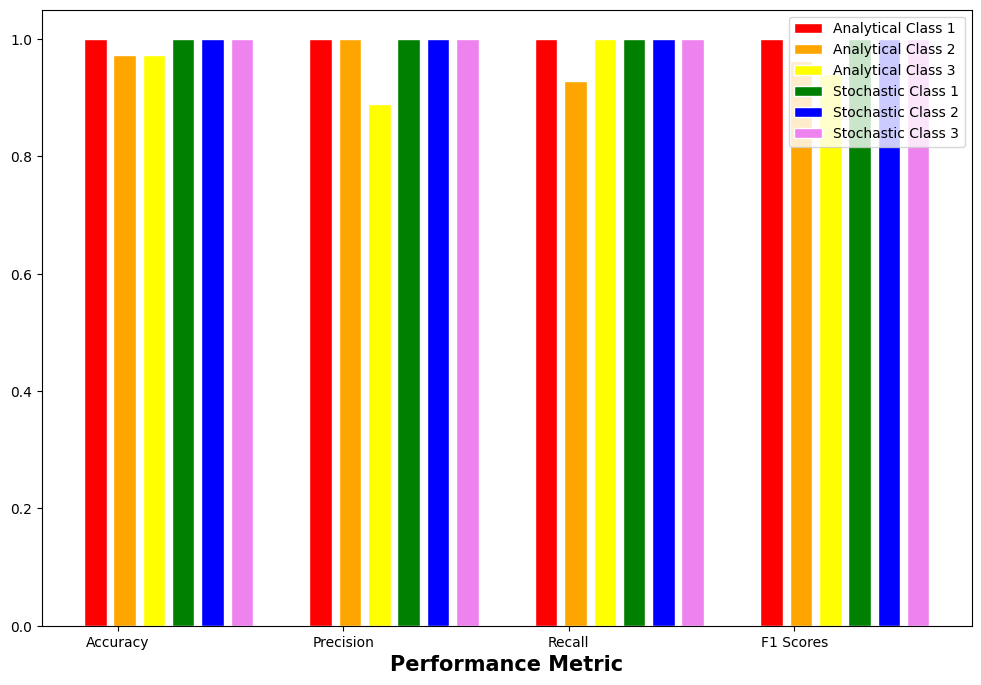

In [ ]:
# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(12, 8))

# reshape data
classic_metrics = [classic_acc, classic_prec, classic_rec, classic_f1]
stochastic_metrics = [stochastic_acc, stochastic_prec, stochastic_rec, stochastic_f1]
class_1, class_2, class_3 = np.zeros((2,4)), np.zeros((2,4)), np.zeros((2,4))
for i in range(len(classic_metrics)):
  class_1[0][i] = classic_metrics[i][0]
  class_1[1][i] = stochastic_metrics[i][0]

  class_2[0][i] = classic_metrics[i][1]
  class_2[1][i] = stochastic_metrics[i][1]

  class_3[0][i] = classic_metrics[i][2]
  class_3[1][i] = stochastic_metrics[i][2]

# Set position of bar on X axis
br1 = np.arange(len(class_1[0]))
br2 = [0.03 + x + barWidth for x in br1]
br3 = [0.03 + x + barWidth for x in br2]
br4 = [0.03 + x + barWidth for x in br3]
br5 = [0.03 + x + barWidth for x in br4]
br6 = [0.03 + x + barWidth for x in br5]

# Make the plot
plt.bar(br1, class_1[0], color ='red', width = barWidth,
        edgecolor ='white', label ='Analytical Class 1')
plt.bar(br2, class_2[0], color ='orange', width = barWidth,
        edgecolor ='white', label ='Analytical Class 2')
plt.bar(br3, class_3[0], color ='yellow', width = barWidth,
        edgecolor ='white', label ='Analytical Class 3')
plt.bar(br4, class_1[1], color ='green', width = barWidth,
        edgecolor ='white', label ='Stochastic Class 1')
plt.bar(br5, class_2[1], color ='blue', width = barWidth,
        edgecolor ='white', label ='Stochastic Class 2')
plt.bar(br6, class_3[1], color ='violet', width = barWidth,
        edgecolor ='white', label ='Stochastic Class 3')

# Adding Xticks
plt.xlabel('Performance Metric', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(class_1[0]))],
        ['Accuracy', 'Precision', 'Recall', 'F1 Scores'])

plt.legend()
plt.show()

## 2. K-fold cross-validation

### Boston Housing Dataset

In [ ]:
def KfoldsLR(df, k=5, model=AnalyticalLinearRegression()):

  n = len(df)
  chunks = [df.iloc[n*i//k:n*(i+1)//k] for i in range(k)]

  # List to store the tuples
  dfs_tuples = []

  # Loop through and create tuples
  for i in range(k):
      training = pd.concat([chunk for j, chunk in enumerate(chunks) if j != i])
      validation = chunks[i]
      dfs_tuples.append((training, validation))
  summedMSEs = 0
  for i in range(len(dfs_tuples)):
    #predictions = model.fit(x_train, y_train).predict(x_test)
    y_p = model.fit(dfs_tuples[i][0].iloc[:, :-1].values, dfs_tuples[i][0].iloc[:, -1].values).predict(dfs_tuples[i][1].iloc[:, :-1].values)
    mse = calculate_mse(dfs_tuples[i][1].iloc[:, -1], y_p)
    #print("Mean Squared Error (MSE) of", i, "is:", mse)
    summedMSEs += mse

  averageMSE = summedMSEs / len(dfs_tuples)
  print("The average MSE after", len(dfs_tuples), "folds is:", averageMSE)
  return averageMSE


def KfoldsLRSGD(df, k=5, model=StochasticLinearRegression(), optimum=StochasticGradientDescent()):
#SHOULD THIS BE LINEARREGRESSION() OR STOCHASTICLINEARREGRESSION
  n = len(df)
  #df = (df - np.mean(df, axis=0)) / np.std(df, axis=0)
  cols_to_normalize = df.columns[:-1]
  df[cols_to_normalize] = (df[cols_to_normalize] - df[cols_to_normalize].mean()) / df[cols_to_normalize].std()

  chunks = [df.iloc[n*i//k:n*(i+1)//k] for i in range(k)]

  # List to store the tuples
  dfs_tuples = []

  # Loop through and create tuples
  for i in range(k):
      training = pd.concat([chunk for j, chunk in enumerate(chunks) if j != i])
      validation = chunks[i]
      dfs_tuples.append((training, validation))
  summedMSEs = 0
  for i in range(len(dfs_tuples)):
    #predictions = model.fit(x_train, y_train).predict(x_test)
    y_p = model.fit(dfs_tuples[i][0].iloc[:, :-1].values, dfs_tuples[i][0].iloc[:, -1].values, optimum).predict(dfs_tuples[i][1].iloc[:, :-1].values)
    mse = calculate_mse(dfs_tuples[i][1].iloc[:, -1], y_p)
    #print("Mean Squared Error (MSE) of", i, "is:", mse)
    summedMSEs += mse

  averageMSE = summedMSEs / len(dfs_tuples)
  print("The average MSE after", len(dfs_tuples), "folds is:", averageMSE)  # AUTO PRINT STATEMENT HERE. CHANGE TO DIFFERENTIAT BETWEEN OUTPUT
  return averageMSE





#BELOW ARE ALL THE TESTS FOR 5 FOLD AND TEN FOLD
fold5_analyticalLinearRegression = KfoldsLR(df_boston, 5, AnalyticalLinearRegression())
fold10_analyticalLinearRegression = KfoldsLR(df_boston, 10, AnalyticalLinearRegression())

fold5_LRSGD = KfoldsLRSGD(df_boston, 5, StochasticLinearRegression())
fold10_LRSGD = KfoldsLRSGD(df_boston, 10, StochasticLinearRegression())

The average MSE after 5 folds is: 36.327134699150776
The average MSE after 10 folds is: 33.763448030658
The average MSE after 5 folds is: 36.37038073494806
The average MSE after 10 folds is: 34.120146828877246


### Wine Dataset

In [ ]:
def KfoldLGR(df, k=5, model=LogisticRegression()):

  n = len(df)
  #df = (df - np.mean(df, axis=0)) / np.std(df, axis=0)
  #cols_to_normalize = df.columns[:-1]
  #df[cols_to_normalize] = (df[cols_to_normalize] - df[cols_to_normalize].mean()) / df[cols_to_normalize].std()

  chunks = [df.iloc[n*i//k:n*(i+1)//k] for i in range(k)]

  # List to store the tuples
  dfs_tuples = []

  # Loop through and create tuples
  for i in range(k):
      training = pd.concat([chunk for j, chunk in enumerate(chunks) if j != i])
      validation = chunks[i]
      dfs_tuples.append((training, validation))
  percentsRightAdded = 0
  for i in range(len(dfs_tuples)):
    #predictions = model.fit(x_train, y_train).predict(x_test)
    y_p = model.fit(dfs_tuples[i][0].iloc[:, :-1].values, dfs_tuples[i][0].iloc[:, -1].values).predict(dfs_tuples[i][1].iloc[:, :-1].values)
    wrong = np.sum(y_p != dfs_tuples[i][1].iloc[:, -1])
    numRows = dfs_tuples[i][0].iloc[:, :-1].values.shape[0]
    acc = (numRows - wrong)/numRows                         #POTENTIALLY REPLACE WITH CALCULATE_METRICS

    #acc = cost_softmax(dfs_tuples[i][1].iloc[:, -1], y_p)

    print("The percent right for iter", i, "is:", acc)
    percentsRightAdded += acc

  averagePercentRight = percentsRightAdded / len(dfs_tuples)
  print("The average percent of correct classifications from ", len(dfs_tuples), "folds is:", averagePercentRight)
  return averagePercentRight


fold5_LGR = KfoldLGR(df_wine)
fold10_LGR = KfoldLGR(df_wine, 10)

fold5_LGR_MB = KfoldLGR(df_wine, 5, StochasticLogisticRegression())
fold10_LGR_MB = KfoldLGR(df_wine, 10, StochasticLogisticRegression())

The percent right for iter 0 is: 0.965034965034965
The percent right for iter 1 is: 0.9366197183098591
The percent right for iter 2 is: 0.8951048951048951
The percent right for iter 3 is: 0.9295774647887324
The percent right for iter 4 is: 0.7464788732394366
The average percent of correct classifications from  5 folds is: 0.8945631832955776
The percent right for iter 0 is: 0.9937888198757764
The percent right for iter 1 is: 0.975
The percent right for iter 2 is: 0.98125
The percent right for iter 3 is: 0.95625
The percent right for iter 4 is: 0.9625
The percent right for iter 5 is: 0.9751552795031055


## 3. Sample growing subsets of the training data
Sample growing subsets of the training data (20%,30%,...80%). Observe and explain how does size of training data affects the performance for both models. Plot two curves as a function of training size, one for performance in train and one for test.

### Boston Housing Dataset

For Analytical Linear Regression


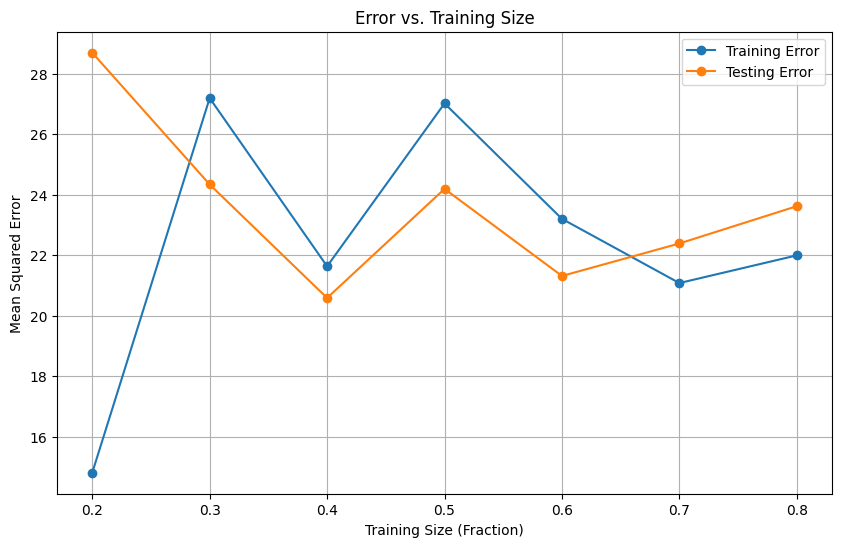

For Mini Batch SGD (Linear Regression)


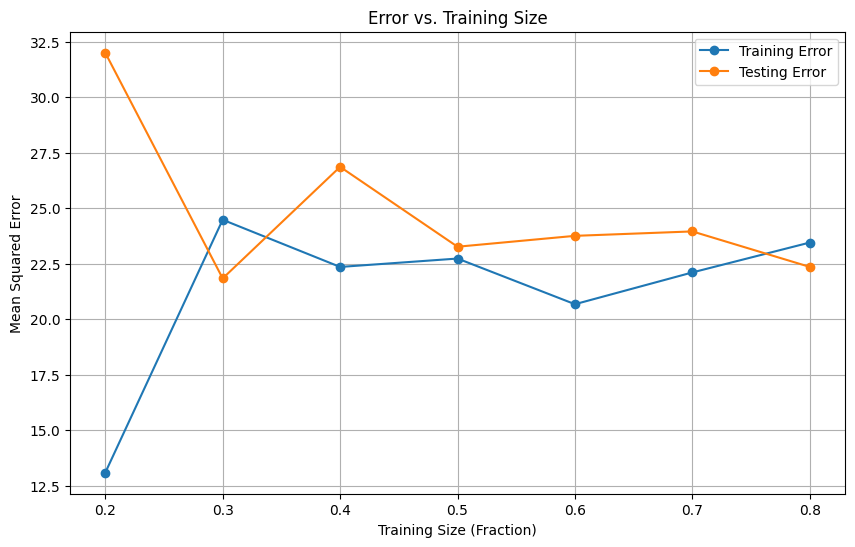

In [ ]:
def twenty_to_eightyLR(df, model=AnalyticalLinearRegression(), sgd=False):

  if sgd:
    model = StochasticLinearRegression()

  # Split data into features and target
  X = df.iloc[:, :-1]
  y = df.iloc[:, -1]

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


  train_errors = []
  test_errors = []

  for size in np.arange(0.2, 0.9, 0.1):  # this will give [0.2, 0.4, 0.6, 0.8]
      sample_size = int(size * len(X_train))

      # Sample subset
      idx = np.random.choice(len(X_train), sample_size, replace=False)
      X_train_subset = X_train.iloc[idx]
      y_train_subset = y_train.iloc[idx]

      # Train the model on the subset
      if not sgd:
        model.fit(X_train_subset, y_train_subset)
      else:
        model.fit(X_train_subset, y_train_subset, StochasticGradientDescent())

      # Predict and calculate errors
      train_pred = model.predict(X_train_subset)
      test_pred = model.predict(X_test)

      train_error = calculate_mse(y_train_subset, train_pred)
      test_error = calculate_mse(y_test, test_pred)

      train_errors.append(train_error)
      test_errors.append(test_error)

  # Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(np.arange(0.2, 0.9, 0.1), train_errors, label="Training Error", marker='o')
  plt.plot(np.arange(0.2, 0.9, 0.1), test_errors, label="Testing Error", marker='o')
  plt.title("Error vs. Training Size")
  plt.xlabel("Training Size (Fraction)")
  plt.ylabel("Mean Squared Error")
  plt.legend()
  plt.grid(True)
  plt.show()

print("For Analytical Linear Regression")
twenty_to_eightyLR(df_boston)

print("For Mini Batch SGD (Linear Regression)")
twenty_to_eightyLR(df_boston, sgd=True)


### Wine Dataset

0.8214285714285714
0.75
0.7857142857142857
0.7777777777777778
0.8035714285714286
0.7222222222222222
0.7605633802816901
0.8333333333333334
0.8
0.6944444444444444
0.7777777777777778
0.8333333333333334
0.7964601769911505
0.8611111111111112


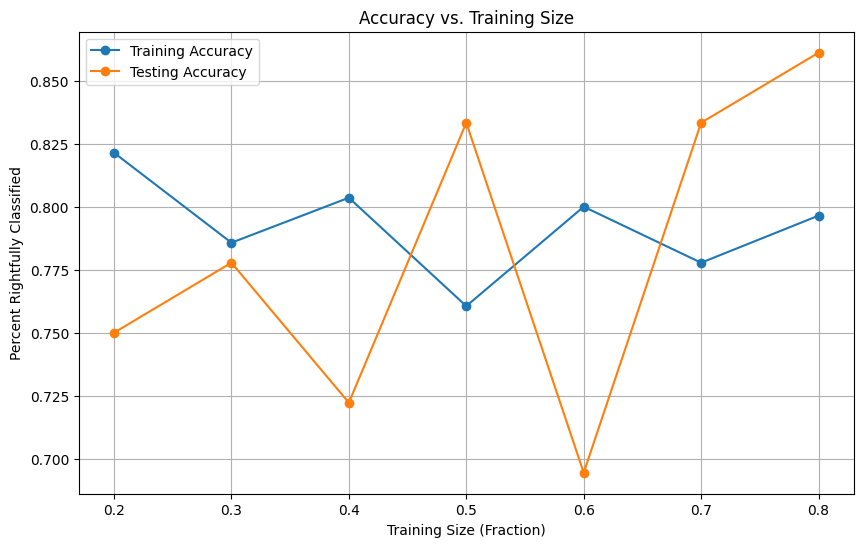

0.75
0.8611111111111112
0.7380952380952381
0.6111111111111112
0.8035714285714286
0.8055555555555556
0.7887323943661971
0.8611111111111112
0.7764705882352941
0.8333333333333334
0.7575757575757576
0.8333333333333334
0.8053097345132744
0.8333333333333334


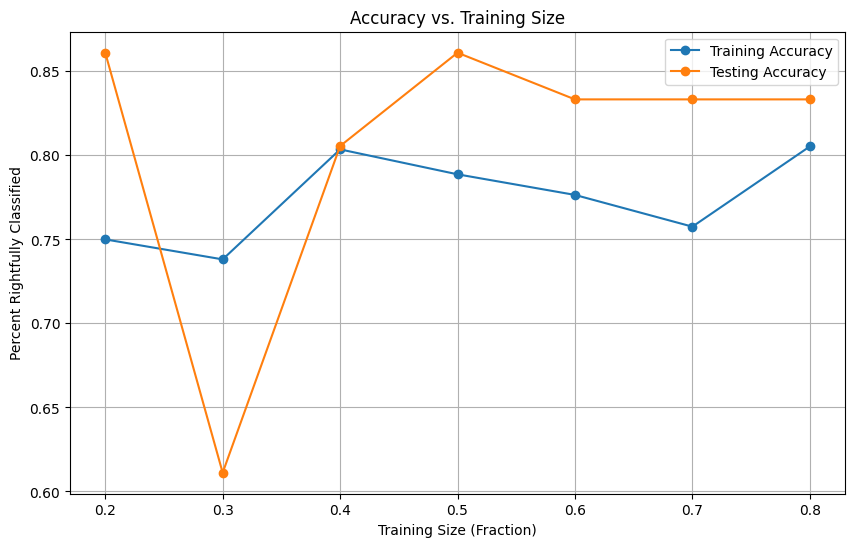

In [ ]:
def twenty_to_eightyLGR(df, model=LogisticRegression(), sgd=False):

  # Split data into features and target
  X = df.iloc[:, :-1]
  y = df.iloc[:, -1]

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


  train_errors = []
  test_errors = []

  for size in np.arange(0.2, 0.9, 0.1):  # this will give [0.2, 0.4, 0.6, 0.8]
      sample_size = int(size * len(X_train))

      # Sample subset
      idx = np.random.choice(len(X_train), sample_size, replace=False)
      #X_train_subset = X_train.iloc[idx]
      #y_train_subset = y_train.iloc[idx]
      X_train_subset = X_train.iloc[idx].reset_index(drop=True)
      y_train_subset = y_train.iloc[idx].reset_index(drop=True)

      # Train the model on the subset
      model.fit(X_train_subset, y_train_subset)


      # Predict and calculate errors
      train_pred = model.predict(X_train_subset)
      test_pred = model.predict(X_test)


      wrong = np.sum(y_train_subset != train_pred)
      numRows = y_train_subset.shape[0]
      train_error = (numRows - wrong)/numRows                                     #THIS IS ACCURACY... MIGHT SWITCH TO CALCULATE MATRICS
      print(train_error)
      # acc,prec,rec,f1 = calculate_metrics(y_train_subset, train_pred)
      # print(acc)

      wrong = np.sum(y_test != test_pred)
      numRows = y_test.shape[0]
      #test_error = calculate_mse(y_test, test_pred)
      test_error = (numRows - wrong) / numRows                                  #THIS IS ACCURACY... MIGHT SWITCH TO CALCULATE MATRICS
      print(test_error)
      # acc,prec,rec,f1 = calculate_metrics(y_test, test_pred)
      # print(acc)

      train_errors.append(train_error)
      test_errors.append(test_error)

  # Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(np.arange(0.2, 0.9, 0.1), train_errors, label="Training Accuracy", marker='o')
  plt.plot(np.arange(0.2, 0.9, 0.1), test_errors, label="Testing Accuracy", marker='o')
  plt.title("Accuracy vs. Training Size")
  plt.xlabel("Training Size (Fraction)")
  plt.ylabel("Percent Rightfully Classified")
  plt.legend()
  plt.grid(True)
  plt.show()

twenty_to_eightyLGR(df_wine)
twenty_to_eightyLGR(df_wine, sgd=True)

## 4. Try growing minibatch sizes
Try out growing minibatch sizes, e.g., 8, 16, 32, 64, and 128. Compare the convergence speed and final performance of different batch sizes to the fully batched baseline. Which configuration works the best among the ones you tried?
Note: This is for SGD only (Task2, third main task).

### Boston Housing Dataset

[45.81194100835306, 16.231388962782404, 12.87389335186336, 11.781839412848417, 11.621886597861788, 11.664548565570703, 11.746607814220642, 11.44317146446086, 11.32077140103271, 11.320852187622846]
[106.48984447390748, 45.19886472810153, 23.97797117100767, 16.258919349858004, 13.533095204346415, 12.614988996566353, 12.562131282093157, 12.018645845821723, 11.949786506617816, 11.641557949311741]
[174.1684534926352, 106.48247834491588, 67.63224726975878, 44.826556461524675, 31.677260628593096, 23.588180257353226, 18.835955759744188, 16.057192606375487, 14.414549246658757, 13.40386068040788]
[221.30468692388334, 165.22569461207942, 126.87219169235809, 98.43424943045613, 77.21104624543678, 61.13096042907909, 49.086961874263004, 39.85486175380648, 33.154331488335224, 27.8969050491252]
[255.2560305314543, 214.14694578748717, 181.79043707759828, 155.74952617972488, 133.84549117166466, 115.81213293490214, 100.83675246441553, 87.11381718784857, 75.98304628413301, 65.82281084365019]
[289.647056584

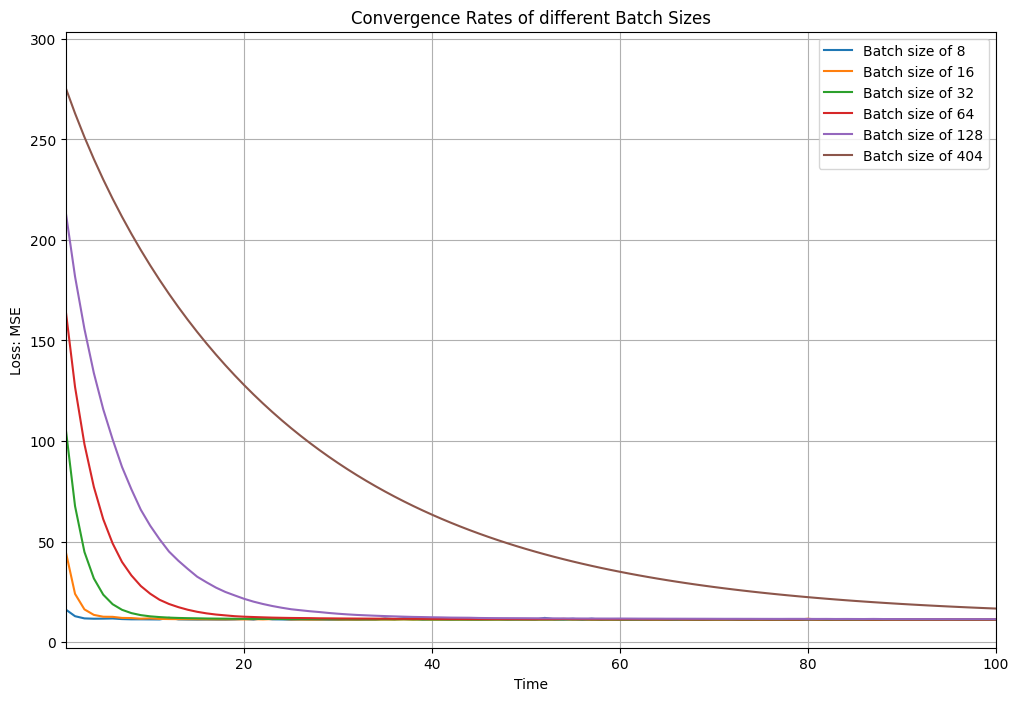

In [ ]:
# normalize data to prevent overflow
x_norm = normalize(x_boston)

# create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_boston, train_size=0.8)

batch_sizes = [8,16,32,64,128, x_train.shape[0]]
times = []
mses = []

plt.figure(figsize=(12, 8))
for batch_size in batch_sizes:
  # create an instance of SGD linear regression model
  model = StochasticLinearRegression()
  optimizer = StochasticGradientDescent(batch_size=batch_size, beta=0.99)

  # time fitting of the model
  start = time.time()
  model.fit(x_train, y_train, optimizer)
  end = time.time()

  # plot graph of convergence time vs MSE
  plt.plot(model.cost_list, label="Batch size of " + str(batch_size))

  print(model.cost_list[:10])
  yh = model.predict(x_test)

  # calculate mean squared error of this model
  mse = calculate_mse(yh, y_test)

  mses.append(mse)
  times.append(end-start)


plt.title("Convergence Rates of different Batch Sizes")
plt.xlabel("Time")
plt.ylabel("Loss: MSE")
plt.legend()
plt.grid(True)
plt.xlim(1,100)
plt.show()

#### Visualize Results

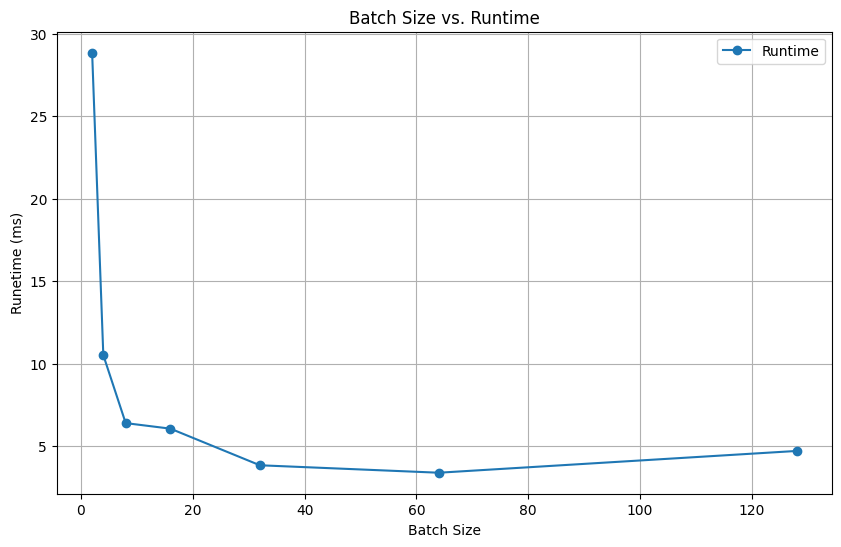

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, times, label="Runtime", marker='o')
plt.title("Batch Size vs. Runtime")
plt.xlabel("Batch Size")
plt.ylabel("Runetime (ms)")
plt.legend()
plt.grid(True)
plt.show()

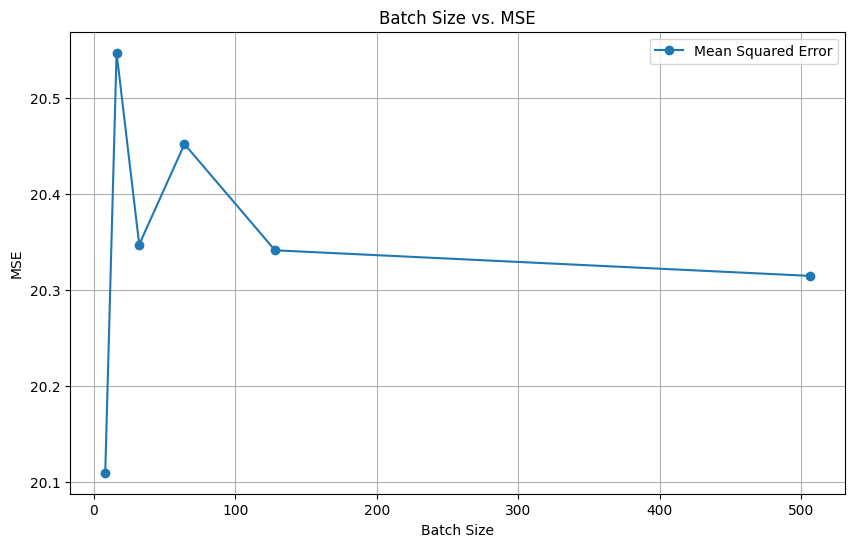

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, mses, label="Mean Squared Error", marker='o')
plt.title("Batch Size vs. MSE")
plt.xlabel("Batch Size")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

#### Conclusions
For the Boston Housing Dataset and the stochastic gradient descent linear regression model, the best batch size which optimizes both run time and mean squared error is 16. The batch size of 16 results in the lowest runtimes and mean squared errors the most consistently in comparison to the other batch sizes tested. The average runtime for fitting a model with a batch size of 16 is ~6ms, while the mean squared error ~21. Additionally, it should be noted that the convergence graph for a batch size of 16 is the smallest batch size which has a mostly smooth curve. All batch sizes tested that are smaller than 16 had rough curves, while batch size 16 is the first convergence graph seen with a smooth curve.

### Wine Dataset

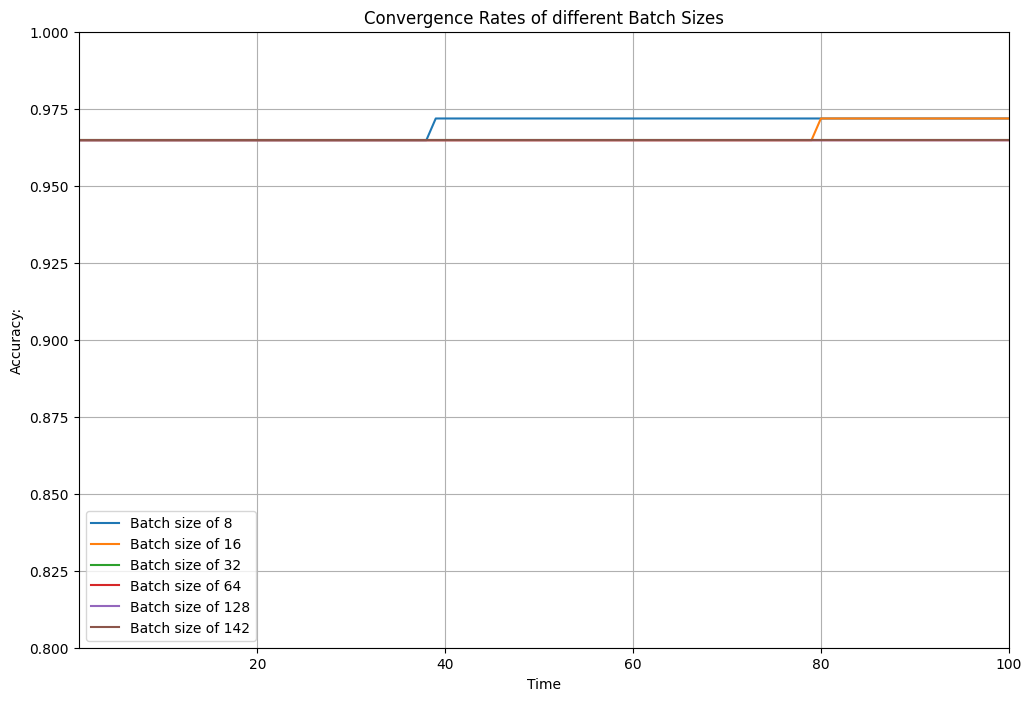

In [ ]:
# normalize data to prevent overflow
x_norm = normalize(x_wine)

# create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_wine, train_size=0.8)

batch_sizes = [8, 16, 32, 64, 128, x_train.shape[0]]
times, accs, precs, recs, f1s, = [],[],[],[],[]

plt.figure(figsize=(12, 8))
for batch_size in batch_sizes:
  # create an instance of the model
  model = StochasticLogisticRegression(batch_size=batch_size)

  # time fitting of the model
  start = time.time()
  model.fit(x_train, y_train)


  #Plots the line using the specific batch size
  plt.plot(model.cost_list, label="Batch size of " + str(batch_size))

  end = time.time()

  yh = model.predict(x_test)

  # calculate performance metrics
  accuracy, precision, recall, f1_scores = calculate_metrics(y_test, yh)

  times.append(end-start)
  accs.append(accuracy)
  precs.append(precision)
  recs.append(recall)
  f1s.append(f1_scores)

plt.title("Convergence Rates of different Batch Sizes")
plt.xlabel("Time")
plt.ylabel("Accuracy:")
plt.legend()
plt.grid(True)
plt.ylim(0.8,1)
plt.xlim(1,100)
plt.show()

#### Visualize Results

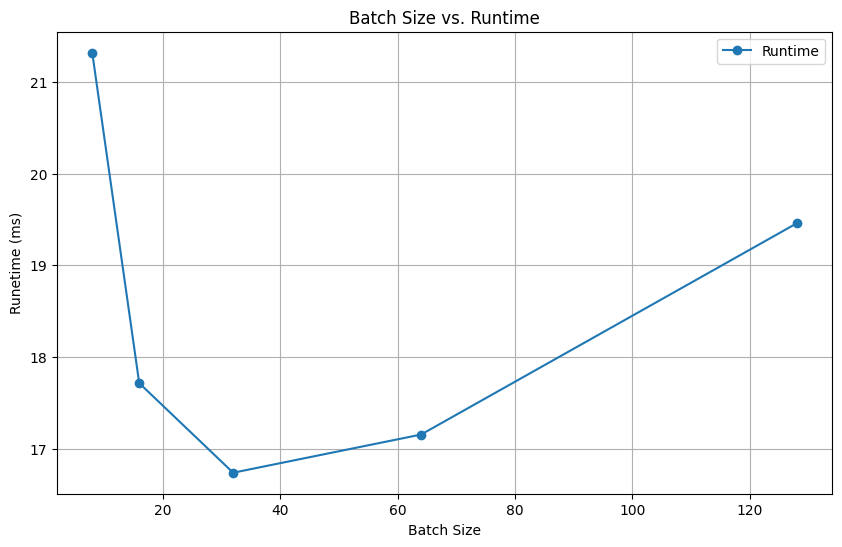

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, times, label="Runtime", marker='o')
plt.title("Batch Size vs. Runtime")
plt.xlabel("Batch Size")
plt.ylabel("Runetime (ms)")
plt.legend()
plt.grid(True)
plt.show()

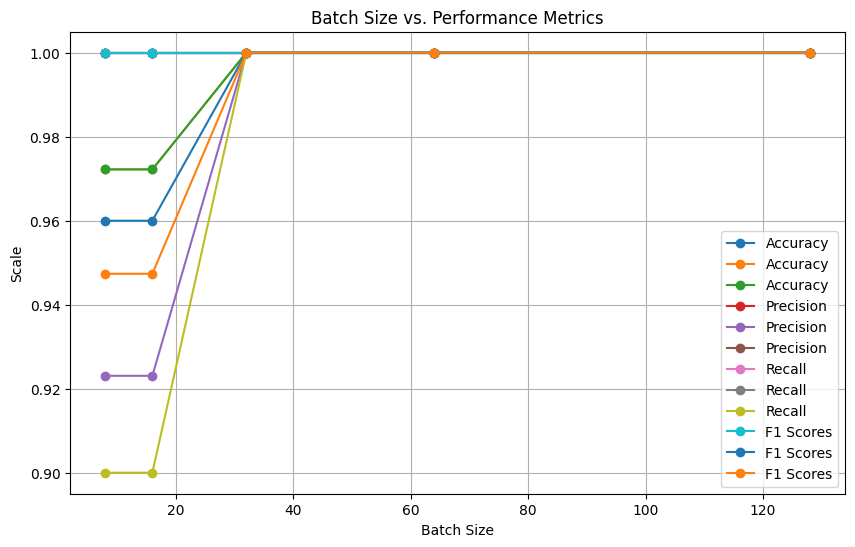

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, accs, label="Accuracy", marker='o')
plt.plot(batch_sizes, precs, label="Precision", marker='o')
plt.plot(batch_sizes, recs, label="Recall", marker='o')
plt.plot(batch_sizes, f1s, label="F1 Scores", marker='o')
plt.title("Batch Size vs. Performance Metrics")
plt.xlabel("Batch Size")
plt.ylabel("Scale")
plt.legend()
plt.grid(True)
plt.show()

## 5. Adjust learning rate
Present the performance of both linear and logistic regression with at least three different learning rates (your own choice).

### Boston Housing Dataset

In [ ]:
# normalize data to prevent overflow
x_norm = normalize(x_boston)

# create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_boston, train_size=0.8)

learning_rates = [0.002,0.007,0.01,0.02,0.035,0.045,0.05,0.06]                                 #TEST WITH LEARNING RATES POWERS OF 10
times = []
mses = []

for learning_rate in learning_rates:
  # create an instance of SGD linear regression model
  model = StochasticLinearRegression()
  optimizer = StochasticGradientDescent(learning_rate=learning_rate)

  # time fitting and predicting of model
  start = time.time()
  model.fit(x_train, y_train, optimizer)
  yh = model.predict(x_test)
  end = time.time()

  # calculate Mean Squared Errors
  mse = calculate_mse(yh, y_test)

  mses.append(mse)
  times.append(end-start)

#### Visualize Results

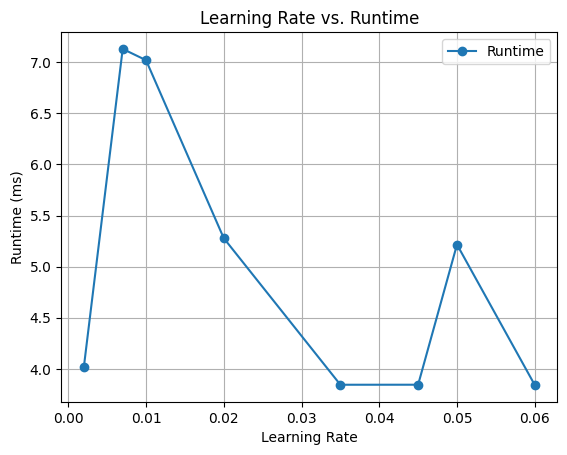

In [ ]:
plt.plot(learning_rates, times, label="Runtime", marker='o')
plt.title("Learning Rate vs. Runtime")
plt.xlabel("Learning Rate")
plt.ylabel("Runtime (ms)")
plt.legend()
plt.grid(True)
plt.show()

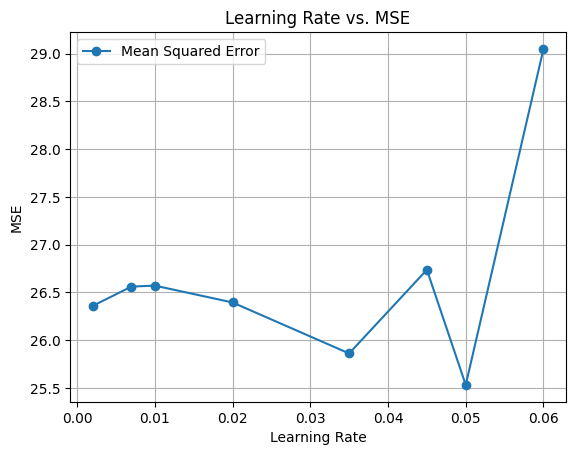

In [ ]:
plt.plot(learning_rates, mses, label="Mean Squared Error", marker='o')
plt.title("Learning Rate vs. MSE")
plt.xlabel("Learning Rate")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

### Wine Dataset

In [ ]:
# normalize data to prevent overflow
x_norm = normalize(x_wine)

# create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_wine, train_size=0.8)

learning_rates = [0.006,0.02,0.03,0.04,0.045,0.05]
times, accs, precs, recs, f1s, = [],[],[],[],[]

for learning_rate in learning_rates:
  # create an instance of SGD linear regression model
  model = StochasticLogisticRegression(learning_rate=learning_rate)

  # time fitting and predicting of model
  start = time.time()
  model.fit(x_train, y_train)
  yh = model.predict(x_test)
  end = time.time()

  # calculate performance metrics
  accuracy, precision, recall, f1_scores = calculate_metrics(y_test, yh)

  times.append(end-start)
  accs.append(accuracy)
  precs.append(precision)
  recs.append(recall)
  f1s.append(f1_scores)

#### Visualize Results

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, times, label="Runtime", marker='o')
plt.title("learning Rate vs. Runtime")
plt.xlabel("learning Rate")
plt.ylabel("Runetime (ms)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accs, label="Accuracy", marker='o')
plt.plot(learning_rates, precs, label="Precision", marker='o')
plt.plot(learning_rates, recs, label="Recall", marker='o')
plt.plot(learning_rates, f1s, label="F1 Scores", marker='o')
plt.title("Learning Rate vs. Performance Metrics")
plt.xlabel("Learning Rate")
plt.legend()
plt.grid(True)
plt.show()

## 6. Select a performance metric and present the optimal parameter choice
Given a variety of parameter configurations, select a performance metric and present the optimal parameter choice for each dataset. Please provide a rationale for your metric selection, along with an explanation of why you opted for that particular metric.

### Boston Housing Dataset

The Mean Squared Error (MSE) will be used to evaluate the performance of the Linear Regression model using Stochastic Gradient Descent on the Boston Housing Dataset. MSE will be used because we can always derive the mean squared error for every different parameter configuration so we can directly compare the performance of every different configuration.

In [ ]:
# set parameters we will test
train_sizes = [0.6,0.7,0.8,0.9]
batch_sizes = [2,4,8,16,32,64,128,256]
learning_rates = [0.002,0.007,0.01,0.02]                                                  #THIS MIGHT CHANGE WHEN WE TRY DIFFERENT LEARNING RATES AND BATCH SIZES

# normalize data to prevent overflow
x_norm = normalize(x_boston)

lowest_mse = float("inf")
lowest_train_size = -1
lowest_batch_size = -1
lowest_learning_rate = -1

for train_size in train_sizes:
  # create train and test sets
  x_train, x_test, y_train, y_test = train_test_split(x_norm, y_boston, train_size=train_size)

  for batch_size in batch_sizes:
    for learning_rate in learning_rates:
      # create an instance of SGD linear regression model
      model = StochasticLinearRegression()
      optimizer = StochasticGradientDescent(batch_size=batch_size, learning_rate=learning_rate)

      # fit and predict of model
      model.fit(x_train, y_train, optimizer)
      yh = model.predict(x_test)

      # calculate Mean Squared Errors
      mse = calculate_mse(yh, y_test)

      if(mse < lowest_mse):
        lowest_mse = mse
        lowest_train_size = train_size
        lowest_batch_size = batch_size
        lowest_learning_rate = learning_rate

In [ ]:
print("The lowest MSE achieved was", round(lowest_mse, 4),
      "when the training set size was", lowest_train_size, "\n",
      "the batch size was", lowest_batch_size,
      "and the learning rate was", lowest_learning_rate,
      ".")

The lowest MSE achieved was 18.5512 when the training set size was 0.6 
 the batch size was 2 and the learning rate was 0.002 .


### Wine Dataset

Accuracy will be used to evaluate the performance of the Logistic Regression model using Stochastic Gradient Descent on the Wine Dataset. Accuracy will be used because it can always be derived for every different parameter configuration so we can directly compare the performance of every different configuration. Accuracy is a good overall impression of how the model is fitting the data because it takes into account the true positives and true negatives, as opposed to other performance metrics such as precision, recall and f1 score which only consider one or the other.

Additionally, it is possible to compute an overall accuracy for a specific set of hyper-parameters on a model whereas precision, recall, and f1 scores cannot be generalized to an overall value and must be computed for each class. Having a singular number makes it possible to maximize and therefore find the most optimal set of hyper-parameters.

In [ ]:
# set parameters we will test
train_sizes = [0.6,0.7,0.8,0.9]
batch_sizes = [4,8,16,32,64,128]
learning_rates = [0.006,0.02,0.03,0.04]

# normalize data to prevent overflow
x_norm = normalize(x_wine)

highest_accuracy = -float("inf")
highest_train_size = -1
highest_batch_size = -1
highest_learning_rate = -1

count = 1

for train_size in train_sizes:
  # create train and test sets
  x_train, x_test, y_train, y_test = train_test_split(x_norm, y_wine, train_size=train_size)

  for batch_size in batch_sizes:
    for learning_rate in learning_rates:
      # create an instance of a logistic regression model using SGD
      model = StochasticLogisticRegression(learning_rate=learning_rate, batch_size=batch_size)

      # fit and predict model
      model.fit(x_train, y_train)
      yh = model.predict(x_test)

      # calculate accurcy
      accuracy = np.count_nonzero(yh == y_test) / yh.shape[0]

      if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        highest_train_size = train_size
        highest_batch_size = batch_size
        highest_learning_rate = learning_rate

      print("------ iter ", count, "------")
      print(highest_accuracy, accuracy)
      print(highest_train_size, train_size)
      print(highest_batch_size, batch_size)
      print(highest_learning_rate, learning_rate)

      count += 1

print(highest_accuracy)
print(highest_train_size)
print(highest_batch_size)
print(highest_learning_rate)

------ iter  1 ------
0.9722222222222222 0.9722222222222222
0.6 0.6
4 4
0.006 0.006
------ iter  2 ------
0.9722222222222222 0.9722222222222222
0.6 0.6
4 4
0.006 0.02
------ iter  3 ------
0.9722222222222222 0.9722222222222222
0.6 0.6
4 4
0.006 0.03
------ iter  4 ------
0.9722222222222222 0.9722222222222222
0.6 0.6
4 4
0.006 0.04
------ iter  5 ------
0.9722222222222222 0.9722222222222222
0.6 0.6
4 8
0.006 0.006
------ iter  6 ------
0.9722222222222222 0.9722222222222222
0.6 0.6
4 8
0.006 0.02
------ iter  7 ------
0.9722222222222222 0.9722222222222222
0.6 0.6
4 8
0.006 0.03
------ iter  8 ------
0.9722222222222222 0.9722222222222222
0.6 0.6
4 8
0.006 0.04
------ iter  9 ------
0.9722222222222222 0.9722222222222222
0.6 0.6
4 16
0.006 0.006
------ iter  10 ------
0.9722222222222222 0.9722222222222222
0.6 0.6
4 16
0.006 0.02
------ iter  11 ------
0.9722222222222222 0.9722222222222222
0.6 0.6
4 16
0.006 0.03
------ iter  12 ------
0.9722222222222222 0.9722222222222222
0.6 0.6
4 16
0.006

In [ ]:
print("The highest accuracy achieved was", round(highest_accuracy, 4),
      "when the training set size was", highest_train_size, "\n",
      "the batch size was", highest_batch_size,
      "and the learning rate was", highest_learning_rate,
      ".")

The highest accuracy achieved was 0.9861 when the training set size was 0.6 
 the batch size was 128 and the learning rate was 0.006 .


## 7. Gaussian Basis Functions
(only for dataset1)
*   Utilize Gaussian basis functions to enrich the feature set for Dataset 1.
*   Define each Gaussian basis function as follows: $\phi_j(x)=exp\left(-\frac{(x-\mu_j)^2}{2s^2}\right)$
*   Employ a total of 5 Gaussian basis functions.
*   Set the spatial scale parameter, s, to a value of 1.
*   Select μj values randomly from the training set to determine the centers of these basis functions. • Use analytical linear regression to predict the target value.

*Compare the target and predicted values obtained with the new dataset with the results obtained with the original feature set, i.e. compare with the results obtained without Gaussian basis functions.*

In [ ]:
def gaussian_basis_function(x, mew, s=1):
  return np.exp(-1 * ((x-mew)**2)/2*s**2)


In [ ]:
def transformed_df(in_matrix):
  #Pick a random uj from a column and set it as the mean for that specific column
  uj_list = []
  for i in range(5):  #5 Columns
    selected_col = in_matrix[ :, i]       # Selects 0th col, 1st....
    mew = random.choice(selected_col)    # Randomly picks a mew from the column
    in_matrix[ :, i] = gaussian_basis_function(in_matrix[ :, i], mew)

  return in_matrix
  #Code above performs the gaussian function on the first 5 columns of the matrix

#Converting the df into a 2d numpy matrix
x_boston = df_boston.drop('MEDV', axis=1).values
y_boston = df_boston['MEDV'].values

norm = normalize(x_boston)
enriched_dataset = pd.DataFrame(transformed_df(norm))


# Testing 5 columns only
# enriched_dataset = enriched_dataset.iloc[:, :5]

In [ ]:
# run analytical linear regression on original dataset and save mse
x_train, x_test, y_train, y_test = train_test_split(x_boston, y_boston, train_size=0.8)
model = AnalyticalLinearRegression()
model.fit(x_train, y_train)
yh = model.predict(x_test)
mse_original = calculate_mse(yh, y_test)

# run analytical linear regression on enriched dataset and save mse
x_train, x_test, y_train, y_test = train_test_split(enriched_dataset, y_boston, train_size=0.8)
model = AnalyticalLinearRegression()
model.fit(x_train, y_train)
yh = model.predict(x_test)
mse_enriched = calculate_mse(yh, y_test)

print("mse_original: ", mse_original)
print("mse_enriched: ", mse_enriched)
# print("mse_with_prior_normalization", mse_enriched_prior_normalization)
# print("mse_with_post_normalization", mse_enriched_post_normalization)

mse_original:  47.11519438565584
mse_enriched:  24.472460607264797


## 8. Compare linear regression and mini-batch SGD solutions
(only for dataset1)

Compare analytical linear regression solution with mini-batch stochastic gradient descent- based linear regression solution. What do you find? Why do you think mini-batch stochastic gradient descent is used when an analytical solution is available?

Two linear regression models were implemented to model the Boston Housing Dataset: Analytical Linear Regression and Linear Regression using Stochastic Gradient Descent.

Upon first trials of comparing the mean squared error of both models, it appeared that the analytical solution was more optimal and would return a lower test error. However, once the hyperparamters of the model using Stochastic Gradient Descent were optimized, the Analytical solution quickly became less optimal than the perfectly tuned model using Stochastic Gradient Descent.

Therefore, to represent the Boston Housing Dataset, Linear Regression using Stochastic Gradient Descent gave better results than Analytical Linear Regression. However, this does not necessarily mean that Stochastic Gradient Descent is always the better choice than Analytical Linear Regression, there are many factors that can lead to one model outperforming the other.

First, the size of the dataset can greatly influence the results of both methods. With small datasets an analytical solution is very quick to compute and can save a lot of computational power compared to stochastic gradient descent methods. However, with a growing dataset the analytical solution becomes very computationally expensive since it involves taking the inverse of a matrix. This runs in $O(n^3)$ where $n$ is the number of datapoints in the dataset.

The way in which the data is collected is also an important factor to consider. For example, if the dataset being worked with is continuously having data added to it then a linear regression model using stochastic gradient descent is more optimal. This is due to the fact that you can continue to train the existing model as more data is collected whereas with an analytical solution all computations would have to be redone with each datapoint added.

The amount of noise in the data is also an important factor. If a dataset has lots of noise then stochastic gradient descent may take a lot of time to converge because each step is likely to be quite off from the optimal direction. Therefore for a very noisy dataset, a linear regression model using stochastic gradient descent is better to use.